In [1]:
import pandas as pd
import numpy as np
dataset = pd.read_csv('QVI_data.csv')
dataset.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream


In [2]:
dataset.shape#To understand numbers of entries and column in dataset.

(264834, 12)

#### Column: LYLTY Card number

In [3]:
dataset['LYLTY_CARD_NBR'].nunique() # No.of.different LYLTY Cards

72636

In [4]:
dataset['TXN_ID'].nunique()#To understand no.of.different transactions

263125

In [5]:
dataset[dataset['TXN_ID'].duplicated()].nunique() #the output from this code shows data with the duplicate txn_id 

LYLTY_CARD_NBR      1656
DATE                 360
STORE_NBR            197
TXN_ID              1702
PROD_NBR             114
PROD_NAME            114
PROD_QTY               5
TOT_SALES             47
PACK_SIZE             21
BRAND                 21
LIFESTAGE              7
PREMIUM_CUSTOMER       3
dtype: int64

In [6]:
dataset['TXN_ID'].nunique() - dataset.shape[0] # no of transactions that are duplicated.

-1709

In [7]:
dataset[dataset['TXN_ID'].duplicated()]['TXN_ID'].unique()#TXN numbers thatt are duplicated.

array([   517,    628,   1142, ..., 269517, 269865, 270140], dtype=int64)

In [8]:
dataset.groupby(['STORE_NBR','DATE']).TOT_SALES.sum() #We will group the data by store nbr and by date

STORE_NBR  DATE      
1          2018-07-01     4.8
           2018-07-02    10.6
           2018-07-03     1.9
           2018-07-04    10.8
           2018-07-06     8.1
                         ... 
272        2019-06-24    14.2
           2019-06-25     7.4
           2019-06-26    10.8
           2019-06-28     8.8
           2019-06-30    16.8
Name: TOT_SALES, Length: 78641, dtype: float64

To get the data month wise, I will create a colmn which on;ly  has the value for month  and year

In [9]:
dataset['YearMonth'] = ["".join(x.split("-")[0:2]) for x in dataset.DATE]
dataset['YearMonth'] = pd.to_numeric(dataset['YearMonth'])
dataset['YearMonth'][0]

201810

Looking at the dataset provided I will like to calculate the following measures
1. What are total number of transactions
2.What are number of customer who mde this transaction.
3. What is the number of packs of chips purchased
4.What is avg price they spend on them., i.e. total sale
5.What quantity of chips are  purchased
6.How many brands are purchased
7. No of transaction per cutomer.


In [10]:
# Number of transaction per store monthy.(not unique transactions)
no_transaction = dataset.groupby(['STORE_NBR','YearMonth']).TXN_ID.nunique()
no_transaction[0:5]

STORE_NBR  YearMonth
1          201807       52
           201808       43
           201809       62
           201810       45
           201811       47
Name: TXN_ID, dtype: int64

In [11]:
# Number of customer per store monthy.(unique customers)
no_Customer = dataset.groupby(['STORE_NBR','YearMonth']).LYLTY_CARD_NBR.nunique()
no_Customer[0:5]

STORE_NBR  YearMonth
1          201807       49
           201808       42
           201809       59
           201810       44
           201811       46
Name: LYLTY_CARD_NBR, dtype: int64

In [12]:
# Number of packets per store monthy.
no_Packet = dataset.groupby(['STORE_NBR','YearMonth']).PROD_QTY.sum()
no_Packet[0:5]

STORE_NBR  YearMonth
1          201807       62
           201808       54
           201809       75
           201810       58
           201811       57
Name: PROD_QTY, dtype: int64

In [13]:
# Average sales per store monthy.
avg_sale = dataset.groupby(['STORE_NBR','YearMonth']).TOT_SALES.sum()
avg_sale[0:5]

STORE_NBR  YearMonth
1          201807       206.9
           201808       176.1
           201809       278.8
           201810       188.1
           201811       192.6
Name: TOT_SALES, dtype: float64

In [14]:
# Qty_chips sold per store monthy.
chips_qty = dataset.groupby(['STORE_NBR','YearMonth']).PACK_SIZE.sum()
chips_qty[0:5]

STORE_NBR  YearMonth
1          201807        9113
           201808        7798
           201809       11148
           201810        7807
           201811        8339
Name: PACK_SIZE, dtype: int64

In [15]:
# How many different brand of chips are being purchased
no_brand = dataset.groupby(['STORE_NBR','YearMonth']).BRAND.nunique()
no_brand[0:5]

STORE_NBR  YearMonth
1          201807       16
           201808       15
           201809       17
           201810       14
           201811       20
Name: BRAND, dtype: int64

In [16]:
# No of transaction per cutomer
trans_per_cust =no_transaction/no_Customer
trans_per_cust[0:5]

STORE_NBR  YearMonth
1          201807       1.061224
           201808       1.023810
           201809       1.050847
           201810       1.022727
           201811       1.021739
dtype: float64

In [17]:
# Concatenate into a new dataframe

COL = [no_transaction,no_Customer,no_Packet, avg_sale,chips_qty,no_brand,trans_per_cust]
measureOverTime = pd.concat(COL, join = 'outer', axis = 1)
measureOverTime

TXN_ID  LYLTY_CARD_NBR  PROD_QTY  TOT_SALES  PACK_SIZE  \
STORE_NBR YearMonth                                                           
1         201807         52              49        62      206.9       9113   
          201808         43              42        54      176.1       7798   
          201809         62              59        75      278.8      11148   
          201810         45              44        58      188.1       7807   
          201811         47              46        57      192.6       8339   
...                     ...             ...       ...        ...        ...   
272       201902         48              45        91      395.5       8415   
          201903         53              50       101      442.3       9680   
          201904         55              54       105      445.1       9036   
          201905         40              34        71      314.6       7115   
          201906         37              34        70      312.1       6528   

                     BRAND         0  
STORE_NBR YearMonth                   
1         201807        16  1.061224  
          201808        15  1.023810  
          201809        17  1.050847  
          201810        14  1.022727  
          201811        20  1.021739  
...                    ...       ...  
272       201902         9  1.066667  
          201903        13  1.060000  
          201904         9  1.018519  
          201905        11  1.176471  
          201906        11  1.088235  

[3169 rows x 7 columns]

In [18]:
measureOverTime.rename(columns = {'TXN_ID': 'no_transaction', 'LYLTY_CARD_NBR': 'no_Customer', 'PROD_QTY': 'no_Packet', 'TOT_SALES': 'avg_sale', 'PACK_SIZE': 'chips_qty','BRAND':'no_brand',0:'trans_per_cust'}, inplace = True)
measureOverTime

no_transaction  no_Customer  no_Packet  avg_sale  \
STORE_NBR YearMonth                                                     
1         201807                 52           49         62     206.9   
          201808                 43           42         54     176.1   
          201809                 62           59         75     278.8   
          201810                 45           44         58     188.1   
          201811                 47           46         57     192.6   
...                             ...          ...        ...       ...   
272       201902                 48           45         91     395.5   
          201903                 53           50        101     442.3   
          201904                 55           54        105     445.1   
          201905                 40           34         71     314.6   
          201906                 37           34         70     312.1   

                     chips_qty  no_brand  trans_per_cust  
STORE_NBR YearMonth                                       
1         201807          9113        16        1.061224  
          201808          7798        15        1.023810  
          201809         11148        17        1.050847  
          201810          7807        14        1.022727  
          201811          8339        20        1.021739  
...                        ...       ...             ...  
272       201902          8415         9        1.066667  
          201903          9680        13        1.060000  
          201904          9036         9        1.018519  
          201905          7115        11        1.176471  
          201906          6528        11        1.088235  

[3169 rows x 7 columns]

In [19]:
#Lets which  store does have a month with no transaction at all
txn_count_monthwise = pd.pivot_table(dataset, index = 'STORE_NBR', columns = 'YearMonth', values = 'TXN_ID', aggfunc = 'count')
txn_count_monthwise

YearMonth,201807,201808,201809,201810,201811,201812,201901,201902,201903,201904,201905,201906
STORE_NBR,,,,,,,,,,,,
1,52.0,43.0,62.0,45.0,47.0,47.0,36.0,55.0,49.0,43.0,51.0,43.0
2,41.0,43.0,37.0,43.0,40.0,38.0,45.0,32.0,46.0,49.0,50.0,42.0
3,138.0,134.0,119.0,119.0,118.0,129.0,121.0,139.0,130.0,110.0,123.0,122.0
4,160.0,151.0,138.0,155.0,139.0,133.0,168.0,102.0,135.0,137.0,126.0,134.0
5,120.0,112.0,125.0,107.0,111.0,125.0,118.0,106.0,97.0,109.0,104.0,127.0
...,...,...,...,...,...,...,...,...,...,...,...,...
268,52.0,54.0,34.0,48.0,51.0,43.0,38.0,37.0,47.0,50.0,52.0,40.0
269,139.0,132.0,124.0,148.0,136.0,133.0,144.0,133.0,122.0,139.0,130.0,127.0
270,139.0,154.0,126.0,119.0,133.0,149.0,155.0,125.0,143.0,132.0,128.0,127.0


In [20]:
txn_count_monthwise.isnull().sum()

YearMonth
201807    6
201808    9
201809    8
201810    7
201811    8
201812    9
201901    9
201902    8
201903    7
201904    7
201905    9
201906    8
dtype: int64

In [21]:
# Store numbers that do not have full observation periods

null_store = txn_count_monthwise[txn_count_monthwise.isnull().any(axis=1)].index.tolist()
len(null_store)

12

We should remove 12  stores from observation.

In [22]:
#StoreData = StoreData[~StoreData['STORE_NBR'].isin(null_store)] 
#This will give error because store_nbr is at index frame in data set, hence we need to give another index column


In [23]:
measureOverTime.reset_index(inplace = True)
measureOverTime = measureOverTime[~measureOverTime['STORE_NBR'].isin(null_store)] 
measureOverTime

,STORE_NBR,YearMonth,no_transaction,no_Customer,no_Packet,avg_sale,chips_qty,no_brand,trans_per_cust
0,1,201807,52,49,62,206.9,9113,16,1.061224
1,1,201808,43,42,54,176.1,7798,15,1.023810
2,1,201809,62,59,75,278.8,11148,17,1.050847
3,1,201810,45,44,58,188.1,7807,14,1.022727
4,1,201811,47,46,57,192.6,8339,20,1.021739
...,...,...,...,...,...,...,...,...,...
3164,272,201902,48,45,91,395.5,8415,9,1.066667
3165,272,201903,53,50,101,442.3,9680,13,1.060000
3166,272,201904,55,54,105,445.1,9036,9,1.018519
3167,272,201905,40,34,71,314.6,7115,11,1.176471


In [24]:
# Filter to pre-trial period i.e. before 201902

BeforeTrail = measureOverTime.loc[measureOverTime['YearMonth'] < 201902, :]
BeforeTrail


,STORE_NBR,YearMonth,no_transaction,no_Customer,no_Packet,avg_sale,chips_qty,no_brand,trans_per_cust
0,1,201807,52,49,62,206.9,9113,16,1.061224
1,1,201808,43,42,54,176.1,7798,15,1.023810
2,1,201809,62,59,75,278.8,11148,17,1.050847
3,1,201810,45,44,58,188.1,7807,14,1.022727
4,1,201811,47,46,57,192.6,8339,20,1.021739
...,...,...,...,...,...,...,...,...,...
3159,272,201809,36,32,71,304.7,6706,13,1.125000
3160,272,201810,50,44,99,430.6,9488,12,1.136364
3161,272,201811,45,41,87,376.2,8617,10,1.097561
3162,272,201812,47,47,89,403.9,9520,13,1.000000


### Store 77

In [25]:
# Create a function which calculates the correlation between trial store and other stores based on a single metric
def calculateCorrelation(inputTable, metric, trial_store):
    output = pd.DataFrame({'Store1': [], 'Store2': [], 'Correlation': []})
    a = inputTable.loc[inputTable['STORE_NBR'] == trial_store, metric]
    a.reset_index(drop = True, inplace = True)
    storeNumbers = inputTable['STORE_NBR'].unique()
    for i in storeNumbers:
        b = inputTable.loc[inputTable['STORE_NBR'] == i, metric]
        b.reset_index(drop = True, inplace = True)
        output = output.append({'Store1': trial_store, 'Store2': i, 'Correlation': b.corr(a)}, ignore_index = True)
    return output


In [26]:
trial_store = 77
corr_nSales = calculateCorrelation(BeforeTrail, 'avg_sale', trial_store)
corr_nCustomers = calculateCorrelation(BeforeTrail, 'no_Customer', trial_store)

corr_nSales
#corr_nCustomers

,Store1,Store2,Correlation
0,77.0,1.0,0.075218
1,77.0,2.0,-0.263079
2,77.0,3.0,0.806644
3,77.0,4.0,-0.263300
4,77.0,5.0,-0.110652
...,...,...,...
255,77.0,268.0,0.344757
256,77.0,269.0,-0.315730
257,77.0,270.0,0.315430
258,77.0,271.0,0.355487


In [27]:
corr_nSales['Correlation'].max()

1.0

In [28]:
# Create another function which calculates a standardised magnitude difference 

def calculateMagnitudeDistance(inputTable, metric, trial_store):
    output = pd.DataFrame({'Store1': [], 'Store2': [], 'Magnitude' : []})
    a = inputTable.loc[inputTable['STORE_NBR'] == trial_store, metric]
    a.reset_index(drop = True, inplace = True)
    storeNumbers = inputTable['STORE_NBR'].unique()
    for i in storeNumbers:
        b = inputTable.loc[inputTable['STORE_NBR'] == i, metric]
        b.reset_index(drop = True, inplace = True)
        c = abs(a-b)
        d = np.mean(1-(c-min(c))/(max(c)-min(c)))
        output = output.append({'Store1': trial_store, 'Store2': i, 'Magnitude': d}, ignore_index = True)
    return output


In [29]:
# Compute magnitude with trial store 233
magnitude_nSales = calculateMagnitudeDistance(BeforeTrail, 'avg_sale', trial_store)
magnitude_nCustomers = calculateMagnitudeDistance(BeforeTrail, 'no_Customer', trial_store)
magnitude_nSales
#magnitude_nCustomers

,Store1,Store2,Magnitude
0,77.0,1.0,0.408163
1,77.0,2.0,0.590119
2,77.0,3.0,0.522914
3,77.0,4.0,0.644934
4,77.0,5.0,0.516320
...,...,...,...
255,77.0,268.0,0.429787
256,77.0,269.0,0.559099
257,77.0,270.0,0.591547
258,77.0,271.0,0.341091


In [30]:
#Concatenate Corr and magnitute for sales.
score_nSales = pd.concat([corr_nSales, magnitude_nSales['Magnitude']], axis = 1)
score_nSales

,Store1,Store2,Correlation,Magnitude
0,77.0,1.0,0.075218,0.408163
1,77.0,2.0,-0.263079,0.590119
2,77.0,3.0,0.806644,0.522914
3,77.0,4.0,-0.263300,0.644934
4,77.0,5.0,-0.110652,0.516320
...,...,...,...,...
255,77.0,268.0,0.344757,0.429787
256,77.0,269.0,-0.315730,0.559099
257,77.0,270.0,0.315430,0.591547
258,77.0,271.0,0.355487,0.341091


In [31]:
# Add an additional column which calculates the weighted average

corr_weight = 0.5
score_nSales['scoreNSales'] = corr_weight * score_nSales['Correlation'] + (1 - corr_weight) * score_nSales['Magnitude']
score_nSales.head()


,Store1,Store2,Correlation,Magnitude,scoreNSales
0,77.0,1.0,0.075218,0.408163,0.241691
1,77.0,2.0,-0.263079,0.590119,0.163520
2,77.0,3.0,0.806644,0.522914,0.664779
3,77.0,4.0,-0.263300,0.644934,0.190817
4,77.0,5.0,-0.110652,0.516320,0.202834


In [32]:
# Now do the same for 'nCustomers'

score_nCustomers = pd.concat([corr_nCustomers, magnitude_nCustomers['Magnitude']], axis = 1)
score_nCustomers

,Store1,Store2,Correlation,Magnitude
0,77.0,1.0,0.322168,0.663866
1,77.0,2.0,-0.572051,0.471429
2,77.0,3.0,0.834207,0.489796
3,77.0,4.0,-0.295639,0.498258
4,77.0,5.0,0.370659,0.512605
...,...,...,...,...
255,77.0,268.0,0.369517,0.571429
256,77.0,269.0,-0.474293,0.484472
257,77.0,270.0,-0.131259,0.536680
258,77.0,271.0,0.019629,0.328571


In [33]:
# Add an additional column which calculates the weighted average

corr_weight = 0.5
score_nCustomers['scoreNCustomers'] = corr_weight * score_nCustomers['Correlation'] + (1 - corr_weight) * score_nCustomers['Magnitude']
score_nCustomers.head()


,Store1,Store2,Correlation,Magnitude,scoreNCustomers
0,77.0,1.0,0.322168,0.663866,0.493017
1,77.0,2.0,-0.572051,0.471429,-0.050311
2,77.0,3.0,0.834207,0.489796,0.662002
3,77.0,4.0,-0.295639,0.498258,0.101310
4,77.0,5.0,0.370659,0.512605,0.441632


In [34]:
# Index both 'score_nSales' and 'score_nCustomers' dataframe

score_nSales.set_index(['Store1', 'Store2'], inplace = True)
score_nCustomers.set_index(['Store1', 'Store2'], inplace = True)


In [35]:
# Create a new dataframe 'score_Control' which takes the average of 'scoreNSales' and 'scoreNCust'

score_Control = pd.concat([score_nSales['scoreNSales'], score_nCustomers['scoreNCustomers']], axis = 1)
score_Control

scoreNSales  scoreNCustomers
Store1 Store2                              
77.0   1.0        0.241691         0.493017
       2.0        0.163520        -0.050311
       3.0        0.664779         0.662002
       4.0        0.190817         0.101310
       5.0        0.202834         0.441632
...                    ...              ...
       268.0      0.387272         0.470473
       269.0      0.121684         0.005090
       270.0      0.453489         0.202710
       271.0      0.348289         0.174100
       272.0      0.320626         0.384336

[260 rows x 2 columns]

In [36]:
# Add a new column to 'score_Control' which computes the average of 'scoreNSales' and 'scoreNCust'

score_Control['finalControlScore'] = 0.5 * (score_Control['scoreNSales'] + score_Control['scoreNCustomers'])
score_Control.head()


scoreNSales  scoreNCustomers  finalControlScore
Store1 Store2                                                 
77.0   1.0        0.241691         0.493017           0.367354
       2.0        0.163520        -0.050311           0.056604
       3.0        0.664779         0.662002           0.663390
       4.0        0.190817         0.101310           0.146064
       5.0        0.202834         0.441632           0.322233

In [37]:
# Let's see the top 5 stores with highest 'finalControlScore'

score_Control.sort_values(by = 'finalControlScore', ascending = False).head()

# Comment: store 71 matches trial store 77 the most 


scoreNSales  scoreNCustomers  finalControlScore
Store1 Store2                                                 
77.0   233.0      0.697290         0.816607           0.756949
       71.0       0.789497         0.663123           0.726310
       84.0       0.656972         0.715000           0.685986
       119.0      0.636046         0.729729           0.682887
       115.0      0.708347         0.645155           0.676751

In [38]:
# Set store 233 as 'control_store'

control_store = 233
# Create a new dataframe 'AfterSales'
AfterSales = BeforeTrail

# Create a new column within 'AfterSales' which categorises store type
store_type = []

for i in AfterSales['STORE_NBR']:
    if i == trial_store:
        store_type.append('Trial Store')
    elif i == control_store:
        store_type.append('Control Store')
    else:
        store_type.append('Other Stores')

AfterSales['store_type'] = store_type
AfterSales.head()


C:\Users\PRANIT~1.SHI\AppData\Local\Temp/ipykernel_2272/2807827976.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AfterSales['store_type'] = store_type


,STORE_NBR,YearMonth,no_transaction,no_Customer,no_Packet,avg_sale,chips_qty,no_brand,trans_per_cust,store_type
0,1,201807,52,49,62,206.9,9113,16,1.061224,Other Stores
1,1,201808,43,42,54,176.1,7798,15,1.023810,Other Stores
2,1,201809,62,59,75,278.8,11148,17,1.050847,Other Stores
3,1,201810,45,44,58,188.1,7807,14,1.022727,Other Stores
4,1,201811,47,46,57,192.6,8339,20,1.021739,Other Stores


In [39]:
AfterSales.info() 


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1820 entries, 0 to 3163
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   STORE_NBR       1820 non-null   int64  
 1   YearMonth       1820 non-null   int64  
 2   no_transaction  1820 non-null   int64  
 3   no_Customer     1820 non-null   int64  
 4   no_Packet       1820 non-null   int64  
 5   avg_sale        1820 non-null   float64
 6   chips_qty       1820 non-null   int64  
 7   no_brand        1820 non-null   int64  
 8   trans_per_cust  1820 non-null   float64
 9   store_type      1820 non-null   object 
dtypes: float64(2), int64(7), object(1)
memory usage: 149.3+ KB


In [40]:
#Yearmonth is in intt64format we need it in date time format
AfterSales['TransactionDate'] = pd.to_datetime(AfterSales['YearMonth'].astype(str), format = '%Y%m')
AfterSales

C:\Users\PRANIT~1.SHI\AppData\Local\Temp/ipykernel_2272/4102911305.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AfterSales['TransactionDate'] = pd.to_datetime(AfterSales['YearMonth'].astype(str), format = '%Y%m')


,STORE_NBR,YearMonth,no_transaction,no_Customer,no_Packet,avg_sale,chips_qty,no_brand,trans_per_cust,store_type,TransactionDate
0,1,201807,52,49,62,206.9,9113,16,1.061224,Other Stores,2018-07-01
1,1,201808,43,42,54,176.1,7798,15,1.023810,Other Stores,2018-08-01
2,1,201809,62,59,75,278.8,11148,17,1.050847,Other Stores,2018-09-01
3,1,201810,45,44,58,188.1,7807,14,1.022727,Other Stores,2018-10-01
4,1,201811,47,46,57,192.6,8339,20,1.021739,Other Stores,2018-11-01
...,...,...,...,...,...,...,...,...,...,...,...
3159,272,201809,36,32,71,304.7,6706,13,1.125000,Other Stores,2018-09-01
3160,272,201810,50,44,99,430.6,9488,12,1.136364,Other Stores,2018-10-01
3161,272,201811,45,41,87,376.2,8617,10,1.097561,Other Stores,2018-11-01
3162,272,201812,47,47,89,403.9,9520,13,1.000000,Other Stores,2018-12-01


In [41]:
# Now create 'totSales' visualisation for control store

# First create relevant dataframes 
controlSales = AfterSales.loc[AfterSales['store_type'] == 'Control Store', ['TransactionDate', 'avg_sale']]
controlSales.set_index('TransactionDate', inplace = True)
controlSales.rename(columns = {'avg_sale': 'Control Store'}, inplace = True)

In [42]:
 # Now create 'totSales' visualisation for Trial Store

TrailSales = AfterSales.loc[AfterSales['store_type'] == 'Trial Store', ['TransactionDate', 'avg_sale']]
TrailSales.set_index('TransactionDate', inplace = True)
TrailSales.rename(columns = {'avg_sale': 'Trial Store'}, inplace = True)

In [43]:

# Now create 'totSales' visualisation for Other Store

OtherSales = AfterSales.loc[AfterSales['store_type'] == 'Other Stores', ['TransactionDate', 'avg_sale']]
OtherSales = pd.DataFrame(OtherSales.groupby('TransactionDate').avg_sale.mean())
OtherSales.rename(columns = {'avg_sale': 'Other Stores'}, inplace = True) 

In [44]:
# Concatenate
combineSales= pd.concat([controlSales, TrailSales, OtherSales],axis =1)

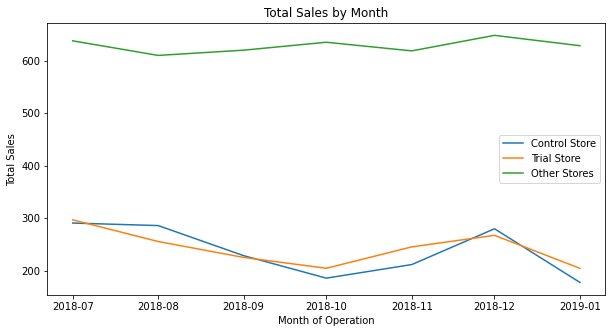

In [45]:
# Plot total sales by month for all 3 types of stores
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 5))
plt.plot(combineSales)
plt.title('Total Sales by Month')
plt.xlabel('Month of Operation')
plt.ylabel('Total Sales')
plt.legend(['Control Store', 'Trial Store', 'Other Stores'], loc = 5)

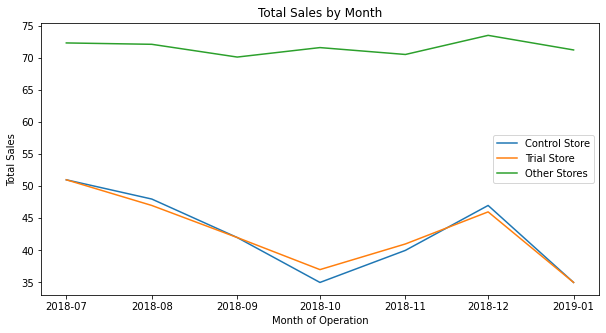

In [46]:
#Do same for no_Customer
# Now create 'totSales' visualisation for control store

# First create relevant dataframes 
controlSales = AfterSales.loc[AfterSales['store_type'] == 'Control Store', ['TransactionDate', 'no_Customer']]
controlSales.set_index('TransactionDate', inplace = True)
controlSales.rename(columns = {'avg_sale': 'Control Store'}, inplace = True)

 # Now create 'totSales' visualisation for Trial Store

TrailSales = AfterSales.loc[AfterSales['store_type'] == 'Trial Store', ['TransactionDate', 'no_Customer']]
TrailSales.set_index('TransactionDate', inplace = True)
TrailSales.rename(columns = {'avg_sale': 'Trial Store'}, inplace = True)

# Now create 'totSales' visualisation for Other Store

OtherSales = AfterSales.loc[AfterSales['store_type'] == 'Other Stores', ['TransactionDate', 'no_Customer']]
OtherSales = pd.DataFrame(OtherSales.groupby('TransactionDate').no_Customer.mean())
OtherSales.rename(columns = {'avg_sale': 'Other Stores'}, inplace = True) 

# Concatenate
combineSales= pd.concat([controlSales, TrailSales, OtherSales],axis =1)

# Plot total sales by month for all 3 types of stores
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 5))
plt.plot(combineSales)
plt.title('Total Sales by Month')
plt.xlabel('Month of Operation')
plt.ylabel('Total Sales')
plt.legend(['Control Store', 'Trial Store', 'Other Stores'], loc = 5)

In [47]:
#Between Feb 2019 to Apr 2019
BeforeTrail.head()

,STORE_NBR,YearMonth,no_transaction,no_Customer,no_Packet,avg_sale,chips_qty,no_brand,trans_per_cust,store_type,TransactionDate
0,1,201807,52,49,62,206.9,9113,16,1.061224,Other Stores,2018-07-01
1,1,201808,43,42,54,176.1,7798,15,1.023810,Other Stores,2018-08-01
2,1,201809,62,59,75,278.8,11148,17,1.050847,Other Stores,2018-09-01
3,1,201810,45,44,58,188.1,7807,14,1.022727,Other Stores,2018-10-01
4,1,201811,47,46,57,192.6,8339,20,1.021739,Other Stores,2018-11-01


In [48]:
#For scaling factor to applied to the control store
trial_sum = BeforeTrail.loc[BeforeTrail['store_type'] == 'Trial Store' , 'avg_sale'].sum()
control_sum = BeforeTrail.loc[BeforeTrail['store_type'] == 'Control Store' , 'avg_sale'].sum()
scaling_factor = trial_sum/control_sum
scaling_factor
# We compute this by dividing sum of 'totSales' for trial store by sum of 'totSales' for control store



1.023617303289553

In [49]:
#
scaledControlSales = measureOverTime
scaledControlSales = scaledControlSales.loc[scaledControlSales['STORE_NBR'] == control_store]
scaledControlSales['controlSales'] = scaledControlSales['avg_sale'] * scaling_factor
scaledControlSales.head()

C:\Users\PRANIT~1.SHI\AppData\Local\Temp/ipykernel_2272/2872622206.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaledControlSales['controlSales'] = scaledControlSales['avg_sale'] * scaling_factor


,STORE_NBR,YearMonth,no_transaction,no_Customer,no_Packet,avg_sale,chips_qty,no_brand,trans_per_cust,controlSales
2699,233,201807,54,51,88,290.7,8588,15,1.058824,297.565550
2700,233,201808,50,48,80,285.9,9137,17,1.041667,292.652187
2701,233,201809,45,42,70,228.6,7295,14,1.071429,233.998916
2702,233,201810,36,35,56,185.7,6544,16,1.028571,190.085733
2703,233,201811,41,40,62,211.6,7282,17,1.025000,216.597421


In [50]:
# Create 'percentageDiff' dataframe
percentDiff = scaledControlSales[['YearMonth', 'controlSales']]
percentDiff.reset_index(drop = True, inplace = True)


In [51]:
# Concatenate with trial store 'totSales'
trialSales = measureOverTime.loc[measureOverTime['STORE_NBR'] == trial_store, 'avg_sale']
trialSales.reset_index(drop = True, inplace = True)
percentDiff = pd.concat([percentDiff, trialSales], axis = 1)
percentDiff.rename(columns = {'avg_sale': 'trialSales'}, inplace = True)

percentDiff


,YearMonth,controlSales,trialSales
0,201807,297.565550,296.8
1,201808,292.652187,255.5
2,201809,233.998916,225.2
3,201810,190.085733,204.5
4,201811,216.597421,245.3
5,201812,286.408121,267.3
6,201901,181.692071,204.4
7,201902,249.762622,235.0
8,201903,203.802205,278.5
9,201904,162.345704,263.5


In [52]:
# Calculate percentage difference and put it in a new column

percentDiff['percentDiff'] = abs(percentDiff.controlSales - percentDiff.trialSales) / percentDiff.controlSales
percentDiff

,YearMonth,controlSales,trialSales,percentDiff
0,201807,297.565550,296.8,0.002573
1,201808,292.652187,255.5,0.126950
2,201809,233.998916,225.2,0.037602
3,201810,190.085733,204.5,0.075830
4,201811,216.597421,245.3,0.132516
5,201812,286.408121,267.3,0.066716
6,201901,181.692071,204.4,0.124980
7,201902,249.762622,235.0,0.059107
8,201903,203.802205,278.5,0.366521
9,201904,162.345704,263.5,0.623080


In [53]:
# Our null hypothesis is such that the trial period is the same as the pre-trial period
# Let's take the standard deviation based on the scaled percentage difference in the pre-trial period
from statistics import stdev
stdDev = stdev(percentDiff.loc[percentDiff['YearMonth'] < 201902, 'percentDiff'])
stdDev

0.04994076264142537

In [54]:
# Define the degrees of freedom
# Since we have 8 pre-trial months, dof = 8 - 1 = 7
dof = 7


In [55]:
# We will test with a null hypothesis of there being 0 difference between trial and control stores
# Create a new column for 'tValue'

percentDiff['tValue'] = (percentDiff['percentDiff'] - 0) / stdDev
percentDiff.loc[(percentDiff['YearMonth'] > 201901) & (percentDiff['YearMonth'] < 201905), 'tValue']


7     1.183534
8     7.339116
9    12.476373
Name: tValue, dtype: float64

In [56]:
# Find the 95th percentile of the t distribution with dof = 7
from scipy.stats import t
t.isf(0.05, dof)

# Comment: We can see that the t-value is much larger than the 95th percentile value of the t-distribution for March and April


1.8945786050613054

In [57]:
# Recall our 'scaledControlSales' dataframe

scaledControlSales.head()


,STORE_NBR,YearMonth,no_transaction,no_Customer,no_Packet,avg_sale,chips_qty,no_brand,trans_per_cust,controlSales
2699,233,201807,54,51,88,290.7,8588,15,1.058824,297.565550
2700,233,201808,50,48,80,285.9,9137,17,1.041667,292.652187
2701,233,201809,45,42,70,228.6,7295,14,1.071429,233.998916
2702,233,201810,36,35,56,185.7,6544,16,1.028571,190.085733
2703,233,201811,41,40,62,211.6,7282,17,1.025000,216.597421


In [58]:
# Add a new column 'TransactionMonth' to 'scaledControlSales'

scaledControlSales['TransactionDate'] = pd.to_datetime(scaledControlSales['YearMonth'].astype(str), format = '%Y%m')
scaledControlSales


C:\Users\PRANIT~1.SHI\AppData\Local\Temp/ipykernel_2272/4293170942.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaledControlSales['TransactionDate'] = pd.to_datetime(scaledControlSales['YearMonth'].astype(str), format = '%Y%m')


,STORE_NBR,YearMonth,no_transaction,no_Customer,no_Packet,avg_sale,chips_qty,no_brand,trans_per_cust,controlSales,TransactionDate
2699,233,201807,54,51,88,290.7,8588,15,1.058824,297.565550,2018-07-01
2700,233,201808,50,48,80,285.9,9137,17,1.041667,292.652187,2018-08-01
2701,233,201809,45,42,70,228.6,7295,14,1.071429,233.998916,2018-09-01
2702,233,201810,36,35,56,185.7,6544,16,1.028571,190.085733,2018-10-01
2703,233,201811,41,40,62,211.6,7282,17,1.025000,216.597421,2018-11-01
2704,233,201812,50,47,75,279.8,9511,14,1.063830,286.408121,2018-12-01
2705,233,201901,35,35,47,177.5,6821,14,1.000000,181.692071,2019-01-01
2706,233,201902,47,45,70,244.0,8042,18,1.044444,249.762622,2019-02-01
2707,233,201903,41,40,59,199.1,7664,14,1.025000,203.802205,2019-03-01
2708,233,201904,32,30,46,158.6,6138,13,1.066667,162.345704,2019-04-01


In [59]:
# Time for some visualisation
# First we need to create the appropriate dataframe
# Extract 'controlSales' from 'scaledControlSales' dataframe for control store 

controlSales = scaledControlSales.loc[:, ['TransactionDate', 'controlSales']]
controlSales.set_index('TransactionDate', inplace = True)
controlSales.rename(columns = {'controlSales': 'Control Sales'}, inplace = True)
controlSales


,Control Sales
TransactionDate,
2018-07-01,297.565550
2018-08-01,292.652187
2018-09-01,233.998916
2018-10-01,190.085733
2018-11-01,216.597421
2018-12-01,286.408121
2019-01-01,181.692071
2019-02-01,249.762622
2019-03-01,203.802205


In [60]:
# Recall 'measureOverTime' dataframe

measureOverTime.head()


,STORE_NBR,YearMonth,no_transaction,no_Customer,no_Packet,avg_sale,chips_qty,no_brand,trans_per_cust
0,1,201807,52,49,62,206.9,9113,16,1.061224
1,1,201808,43,42,54,176.1,7798,15,1.023810
2,1,201809,62,59,75,278.8,11148,17,1.050847
3,1,201810,45,44,58,188.1,7807,14,1.022727
4,1,201811,47,46,57,192.6,8339,20,1.021739


In [61]:
# Create a new column 'TransationDate' under 'measureOverTime' dataframe

measureOverTime['TransactionDate'] = pd.to_datetime(measureOverTime['YearMonth'].astype(str), format = '%Y%m')
measureOverTime.head()


C:\Users\PRANIT~1.SHI\AppData\Local\Temp/ipykernel_2272/4078677994.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  measureOverTime['TransactionDate'] = pd.to_datetime(measureOverTime['YearMonth'].astype(str), format = '%Y%m')


,STORE_NBR,YearMonth,no_transaction,no_Customer,no_Packet,avg_sale,chips_qty,no_brand,trans_per_cust,TransactionDate
0,1,201807,52,49,62,206.9,9113,16,1.061224,2018-07-01
1,1,201808,43,42,54,176.1,7798,15,1.023810,2018-08-01
2,1,201809,62,59,75,278.8,11148,17,1.050847,2018-09-01
3,1,201810,45,44,58,188.1,7807,14,1.022727,2018-10-01
4,1,201811,47,46,57,192.6,8339,20,1.021739,2018-11-01


In [62]:
# Extract 'totSales' for trial store from 'measureOverTime'

trialSales = measureOverTime.loc[measureOverTime['STORE_NBR'] == trial_store, ['TransactionDate', 'avg_sale']]
trialSales.set_index('TransactionDate', inplace = True)
trialSales.rename(columns = {'totSales': 'Trial Sales'}, inplace = True)
trialSales


,avg_sale
TransactionDate,
2018-07-01,296.8
2018-08-01,255.5
2018-09-01,225.2
2018-10-01,204.5
2018-11-01,245.3
2018-12-01,267.3
2019-01-01,204.4
2019-02-01,235.0
2019-03-01,278.5


In [63]:
# Create two new columns under 'controlSales' which calculates the 5% and 95% confidence interval

controlSales['5% CI'] = controlSales['Control Sales'] * (1 - stdDev*2)
controlSales['95% CI'] = controlSales['Control Sales'] * (1 + stdDev*2)
controlSales


,Control Sales,5% CI,95% CI
TransactionDate,,,
2018-07-01,297.565550,267.844249,327.286851
2018-08-01,292.652187,263.421640,321.882734
2018-09-01,233.998916,210.626747,257.371084
2018-10-01,190.085733,171.099680,209.071786
2018-11-01,216.597421,194.963341,238.231502
2018-12-01,286.408121,257.801241,315.015001
2019-01-01,181.692071,163.544390,199.839753
2019-02-01,249.762622,224.815950,274.709294
2019-03-01,203.802205,183.446130,224.158280


In [64]:
# Merge the two dataframes together 'controlSales' and 'trialSales'

combineSales = pd.merge(controlSales, trialSales, left_index = True, right_index = True)
combineSales


,Control Sales,5% CI,95% CI,avg_sale
TransactionDate,,,,
2018-07-01,297.565550,267.844249,327.286851,296.8
2018-08-01,292.652187,263.421640,321.882734,255.5
2018-09-01,233.998916,210.626747,257.371084,225.2
2018-10-01,190.085733,171.099680,209.071786,204.5
2018-11-01,216.597421,194.963341,238.231502,245.3
2018-12-01,286.408121,257.801241,315.015001,267.3
2019-01-01,181.692071,163.544390,199.839753,204.4
2019-02-01,249.762622,224.815950,274.709294,235.0
2019-03-01,203.802205,183.446130,224.158280,278.5


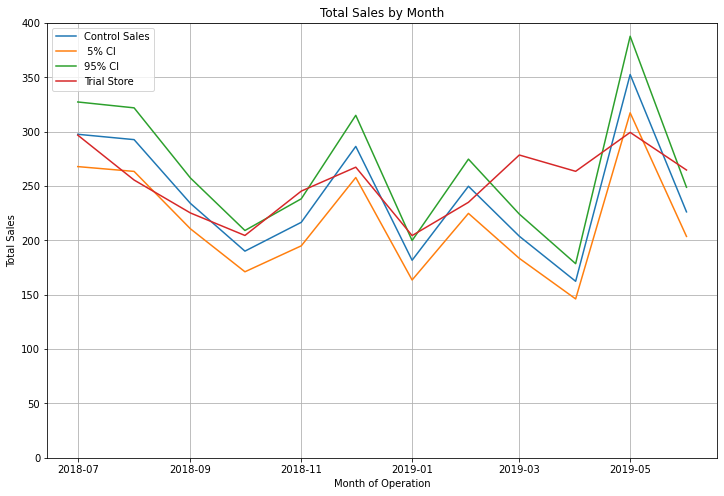

In [65]:
plt.figure(figsize = (12, 8))
plt.plot(combineSales)
plt.title('Total Sales by Month')
plt.xlabel('Month of Operation')
plt.ylabel('Total Sales')
plt.legend(['Control Sales', ' 5% CI', '95% CI', 'Trial Store'], loc = 2)
plt.ylim((0, 400))
plt.grid()
plt.show()


when we look at the feb2019 and march 2019 we see high sales from controlstore 233, 
then those in CI for our trail store 77

In [66]:
BeforeTrail.head()

,STORE_NBR,YearMonth,no_transaction,no_Customer,no_Packet,avg_sale,chips_qty,no_brand,trans_per_cust,store_type,TransactionDate
0,1,201807,52,49,62,206.9,9113,16,1.061224,Other Stores,2018-07-01
1,1,201808,43,42,54,176.1,7798,15,1.023810,Other Stores,2018-08-01
2,1,201809,62,59,75,278.8,11148,17,1.050847,Other Stores,2018-09-01
3,1,201810,45,44,58,188.1,7807,14,1.022727,Other Stores,2018-10-01
4,1,201811,47,46,57,192.6,8339,20,1.021739,Other Stores,2018-11-01


In [67]:
# now letscompute the same forn  no of customer say ncustomers
trial_customers = BeforeTrail.loc[BeforeTrail['store_type'] == 'Trial Store' , 'no_Customer'].sum()
control_customers = BeforeTrail.loc[BeforeTrail['store_type'] == 'Control Store', 'no_Customer'].sum()
scalingFactor_Cust = trial_customers / control_customers
scalingFactor_Cust


1.0033557046979866

In [68]:
scaledControlCustomers = measureOverTime
scaledControlCustomers = scaledControlCustomers.loc[scaledControlCustomers['STORE_NBR'] == control_store]
scaledControlCustomers['controlCustomers'] = scaledControlCustomers['no_Customer'] * scalingFactor_Cust
scaledControlCustomers.head()

C:\Users\PRANIT~1.SHI\AppData\Local\Temp/ipykernel_2272/2143537957.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaledControlCustomers['controlCustomers'] = scaledControlCustomers['no_Customer'] * scalingFactor_Cust


,STORE_NBR,YearMonth,no_transaction,no_Customer,no_Packet,avg_sale,chips_qty,no_brand,trans_per_cust,TransactionDate,controlCustomers
2699,233,201807,54,51,88,290.7,8588,15,1.058824,2018-07-01,51.171141
2700,233,201808,50,48,80,285.9,9137,17,1.041667,2018-08-01,48.161074
2701,233,201809,45,42,70,228.6,7295,14,1.071429,2018-09-01,42.140940
2702,233,201810,36,35,56,185.7,6544,16,1.028571,2018-10-01,35.117450
2703,233,201811,41,40,62,211.6,7282,17,1.025000,2018-11-01,40.134228


In [69]:
#To get number of trail and control store customer
# Create 'percentageDiff' dataframe
percentageDiff = scaledControlCustomers[['YearMonth', 'controlCustomers']]
percentageDiff.reset_index(drop = True, inplace = True)

# Concatenate with trial store 'nCustomers'
trialCustomers = measureOverTime.loc[measureOverTime['STORE_NBR'] == trial_store, 'no_Customer']
trialCustomers.reset_index(drop = True, inplace = True)
percentageDiff = pd.concat([percentageDiff, trialCustomers], axis = 1)
percentageDiff.rename(columns = {'no_Customer': 'trialCustomers'}, inplace = True)
percentageDiff

,YearMonth,controlCustomers,trialCustomers
0,201807,51.171141,51
1,201808,48.161074,47
2,201809,42.140940,42
3,201810,35.117450,37
4,201811,40.134228,41
5,201812,47.157718,46
6,201901,35.117450,35
7,201902,45.151007,45
8,201903,40.134228,50
9,201904,30.100671,47


In [70]:
# Calculate percentage difference and put it in a new column

percentageDiff['percentageDiff'] = abs(percentageDiff.controlCustomers - percentageDiff.trialCustomers) / percentageDiff.controlCustomers
percentageDiff


,YearMonth,controlCustomers,trialCustomers,percentageDiff
0,201807,51.171141,51,0.003344
1,201808,48.161074,47,0.024108
2,201809,42.140940,42,0.003344
3,201810,35.117450,37,0.053607
4,201811,40.134228,41,0.021572
5,201812,47.157718,46,0.024550
6,201901,35.117450,35,0.003344
7,201902,45.151007,45,0.003344
8,201903,40.134228,50,0.245819
9,201904,30.100671,47,0.561427


In [71]:
# Our null hypothesis is such that the trial period is the same as the pre-trial period
# Let's take the standard deviation based on the scaled percentage difference in the pre-trial period

stdDev = stdev(percentageDiff.loc[percentageDiff['YearMonth'] < 201902, 'percentageDiff'])
stdDev


0.018240748558243945

In [72]:
dof = 7
# We will test with a null hypothesis of there being 0 difference between trial and control stores
# Create a new column for 'tValue'

percentageDiff['tValue'] = (percentageDiff['percentageDiff'] - 0) / stdDev

percentageDiff.loc[(percentageDiff['YearMonth'] > 201901) & (percentageDiff['YearMonth'] < 201905), 'tValue']


7     0.183352
8    13.476388
9    30.778725
Name: tValue, dtype: float64

In [73]:
t.isf(0.05, dof)


1.8945786050613054

In [74]:
# Comment: We can see that the t-value is much larger than the 95th percentile value of the t-distribution for March and April


In [75]:
# Time for some visualisation
# First we need to create the appropriate dataframe
# Extract 'controlCustomers' from 'scaledControlCustomers' dataframe for control store 

controlCustomers = scaledControlCustomers.loc[:, ['TransactionDate', 'controlCustomers']]
controlCustomers.set_index('TransactionDate', inplace = True)
controlCustomers.rename(columns = {'controlCustomers': 'Control Customers'}, inplace = True)
controlCustomers


,Control Customers
TransactionDate,
2018-07-01,51.171141
2018-08-01,48.161074
2018-09-01,42.140940
2018-10-01,35.117450
2018-11-01,40.134228
2018-12-01,47.157718
2019-01-01,35.117450
2019-02-01,45.151007
2019-03-01,40.134228


In [76]:
# Extract 'nCustomers' for trial store from 'measureOverTime'

trialCustomers = measureOverTime.loc[measureOverTime['STORE_NBR'] == trial_store, ['TransactionDate', 'no_Customer']]
trialCustomers.set_index('TransactionDate', inplace = True)
trialCustomers.rename(columns = {'no_Customer': 'Trial Customers'}, inplace = True)
trialCustomers


,Trial Customers
TransactionDate,
2018-07-01,51
2018-08-01,47
2018-09-01,42
2018-10-01,37
2018-11-01,41
2018-12-01,46
2019-01-01,35
2019-02-01,45
2019-03-01,50


In [77]:
controlCustomers['5%CI'] = controlCustomers['Control Customers'] * (1 - stdDev*2)
controlCustomers['95% CI'] = controlCustomers['Control Customers'] * (1 + stdDev*2)
controlCustomers


,Control Customers,5%CI,95% CI
TransactionDate,,,
2018-07-01,51.171141,49.304341,53.037941
2018-08-01,48.161074,46.404086,49.918062
2018-09-01,42.140940,40.603575,43.678304
2018-10-01,35.117450,33.836313,36.398587
2018-11-01,40.134228,38.670071,41.598385
2018-12-01,47.157718,45.437334,48.878102
2019-01-01,35.117450,33.836313,36.398587
2019-02-01,45.151007,43.503830,46.798183
2019-03-01,40.134228,38.670071,41.598385


In [78]:
# Merge the two dataframes together 'controlSales' and 'trialSales'

combineCustomers = pd.merge(controlCustomers, trialCustomers, left_index = True, right_index = True)
combineCustomers


,Control Customers,5%CI,95% CI,Trial Customers
TransactionDate,,,,
2018-07-01,51.171141,49.304341,53.037941,51
2018-08-01,48.161074,46.404086,49.918062,47
2018-09-01,42.140940,40.603575,43.678304,42
2018-10-01,35.117450,33.836313,36.398587,37
2018-11-01,40.134228,38.670071,41.598385,41
2018-12-01,47.157718,45.437334,48.878102,46
2019-01-01,35.117450,33.836313,36.398587,35
2019-02-01,45.151007,43.503830,46.798183,45
2019-03-01,40.134228,38.670071,41.598385,50


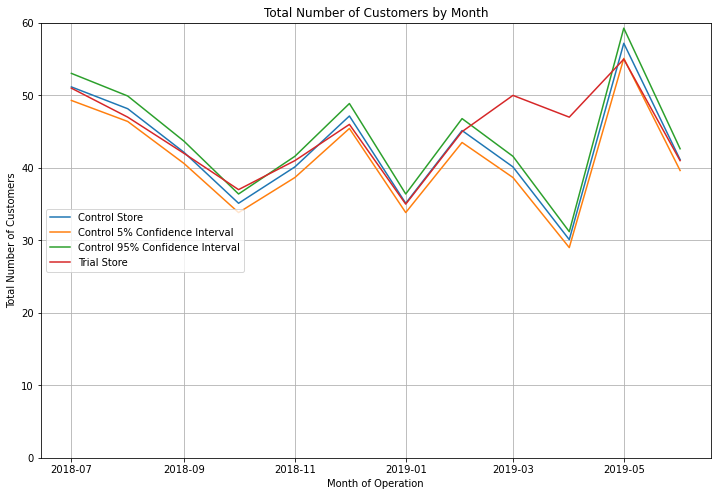

In [79]:
plt.figure(figsize = (12, 8))
plt.plot(combineCustomers)

# Set graph title and axis title
plt.title('Total Number of Customers by Month')
plt.xlabel('Month of Operation')
plt.ylabel('Total Number of Customers')

# Set legend
plt.legend(['Control Store', 'Control 5% Confidence Interval', 'Control 95% Confidence Interval', 'Trial Store'], loc = 6)

# Set new y-axis limit
plt.ylim((0, 60))


# Set grid
plt.grid()
plt.show()


In [80]:
#Agan in terms of number of customers, the control store has higher number in feb 2019 to april 2019.

# Store 86

In [81]:
trial_store = 86
corr_nSales = calculateCorrelation(BeforeTrail, 'avg_sale', trial_store)
corr_nCustomers = calculateCorrelation(BeforeTrail, 'no_Customer', trial_store)

corr_nSales
#corr_nCustomers

,Store1,Store2,Correlation
0,86.0,1.0,0.445632
1,86.0,2.0,-0.403835
2,86.0,3.0,-0.261284
3,86.0,4.0,-0.039035
4,86.0,5.0,0.235159
...,...,...,...
255,86.0,268.0,-0.452182
256,86.0,269.0,0.697055
257,86.0,270.0,-0.730679
258,86.0,271.0,0.527637


In [82]:
# Compute magnitude with trial store 86
magnitude_nSales = calculateMagnitudeDistance(BeforeTrail, 'avg_sale', trial_store)
magnitude_nCustomers = calculateMagnitudeDistance(BeforeTrail, 'no_Customer', trial_store)
magnitude_nSales
#magnitude_nCustomers

,Store1,Store2,Magnitude
0,86.0,1.0,0.488334
1,86.0,2.0,0.321131
2,86.0,3.0,0.507515
3,86.0,4.0,0.635654
4,86.0,5.0,0.579835
...,...,...,...
255,86.0,268.0,0.291930
256,86.0,269.0,0.480267
257,86.0,270.0,0.517014
258,86.0,271.0,0.565665


In [83]:
#Concatenate Corr and magnitute for sales.
score_nSales = pd.concat([corr_nSales, magnitude_nSales['Magnitude']], axis = 1)
score_nSales

,Store1,Store2,Correlation,Magnitude
0,86.0,1.0,0.445632,0.488334
1,86.0,2.0,-0.403835,0.321131
2,86.0,3.0,-0.261284,0.507515
3,86.0,4.0,-0.039035,0.635654
4,86.0,5.0,0.235159,0.579835
...,...,...,...,...
255,86.0,268.0,-0.452182,0.291930
256,86.0,269.0,0.697055,0.480267
257,86.0,270.0,-0.730679,0.517014
258,86.0,271.0,0.527637,0.565665


In [84]:
# Add an additional column which calculates the weighted average

corr_weight = 0.5
score_nSales['scoreNSales'] = corr_weight * score_nSales['Correlation'] + (1 - corr_weight) * score_nSales['Magnitude']

In [85]:
# Now do the same for 'nCustomers'

score_nCustomers = pd.concat([corr_nCustomers, magnitude_nCustomers['Magnitude']], axis = 1)
score_nCustomers

,Store1,Store2,Correlation,Magnitude
0,86.0,1.0,0.485831,0.510204
1,86.0,2.0,-0.086161,0.428571
2,86.0,3.0,-0.353786,0.563025
3,86.0,4.0,-0.169608,0.537815
4,86.0,5.0,-0.253229,0.714286
...,...,...,...,...
255,86.0,268.0,-0.034273,0.566327
256,86.0,269.0,-0.098587,0.581633
257,86.0,270.0,-0.767267,0.650794
258,86.0,271.0,0.267393,0.598214


In [86]:
# Add an additional column which calculates the weighted average

corr_weight = 0.5
score_nCustomers['scoreNCustomers'] = corr_weight * score_nCustomers['Correlation'] + (1 - corr_weight) * score_nCustomers['Magnitude']
score_nCustomers.head()


,Store1,Store2,Correlation,Magnitude,scoreNCustomers
0,86.0,1.0,0.485831,0.510204,0.498018
1,86.0,2.0,-0.086161,0.428571,0.171205
2,86.0,3.0,-0.353786,0.563025,0.104620
3,86.0,4.0,-0.169608,0.537815,0.184103
4,86.0,5.0,-0.253229,0.714286,0.230528


In [87]:
# Index both 'score_nSales' and 'score_nCustomers' dataframe

score_nSales.set_index(['Store1', 'Store2'], inplace = True)
score_nCustomers.set_index(['Store1', 'Store2'], inplace = True)


In [88]:
# Create a new dataframe 'score_Control' which takes the average of 'scoreNSales' and 'scoreNCust'

score_Control = pd.concat([score_nSales['scoreNSales'], score_nCustomers['scoreNCustomers']], axis = 1)
score_Control

scoreNSales  scoreNCustomers
Store1 Store2                              
86.0   1.0        0.466983         0.498018
       2.0       -0.041352         0.171205
       3.0        0.123116         0.104620
       4.0        0.298309         0.184103
       5.0        0.407497         0.230528
...                    ...              ...
       268.0     -0.080126         0.266027
       269.0      0.588661         0.241523
       270.0     -0.106832        -0.058237
       271.0      0.546651         0.432804
       272.0      0.294383         0.139863

[260 rows x 2 columns]

In [89]:
# Add a new column to 'score_Control' which computes the average of 'scoreNSales' and 'scoreNCust'

score_Control['finalControlScore'] = 0.5 * (score_Control['scoreNSales'] + score_Control['scoreNCustomers'])
score_Control.head()


scoreNSales  scoreNCustomers  finalControlScore
Store1 Store2                                                 
86.0   1.0        0.466983         0.498018           0.482500
       2.0       -0.041352         0.171205           0.064927
       3.0        0.123116         0.104620           0.113868
       4.0        0.298309         0.184103           0.241206
       5.0        0.407497         0.230528           0.319013

In [90]:
# Let's see the top 5 stores with highest 'finalControlScore'

score_Control.sort_values(by = 'finalControlScore', ascending = False).head()

# Comment: store  matches trial store 86 the most 


scoreNSales  scoreNCustomers  finalControlScore
Store1 Store2                                                 
86.0   155.0      0.808106         0.733343           0.770724
       109.0      0.697120         0.742532           0.719826
       114.0      0.631393         0.663384           0.647389
       225.0      0.601841         0.684356           0.643099
       138.0      0.593296         0.660565           0.626930

In [91]:
# Set store 233 as 'control_store'

control_store = 155
# Create a new dataframe 'AfterSales'
AfterSales = BeforeTrail

# Create a new column within 'AfterSales' which categorises store type
store_type = []

for i in AfterSales['STORE_NBR']:
    if i == trial_store:
        store_type.append('Trial Store')
    elif i == control_store:
        store_type.append('Control Store')
    else:
        store_type.append('Other Stores')

AfterSales['store_type'] = store_type
AfterSales.head()


C:\Users\PRANIT~1.SHI\AppData\Local\Temp/ipykernel_2272/3945432856.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AfterSales['store_type'] = store_type


,STORE_NBR,YearMonth,no_transaction,no_Customer,no_Packet,avg_sale,chips_qty,no_brand,trans_per_cust,store_type,TransactionDate
0,1,201807,52,49,62,206.9,9113,16,1.061224,Other Stores,2018-07-01
1,1,201808,43,42,54,176.1,7798,15,1.023810,Other Stores,2018-08-01
2,1,201809,62,59,75,278.8,11148,17,1.050847,Other Stores,2018-09-01
3,1,201810,45,44,58,188.1,7807,14,1.022727,Other Stores,2018-10-01
4,1,201811,47,46,57,192.6,8339,20,1.021739,Other Stores,2018-11-01


In [92]:
#Yearmonth is in intt64format we need it in date time format
AfterSales['TransactionDate'] = pd.to_datetime(AfterSales['YearMonth'].astype(str), format = '%Y%m')
AfterSales

C:\Users\PRANIT~1.SHI\AppData\Local\Temp/ipykernel_2272/4102911305.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AfterSales['TransactionDate'] = pd.to_datetime(AfterSales['YearMonth'].astype(str), format = '%Y%m')


,STORE_NBR,YearMonth,no_transaction,no_Customer,no_Packet,avg_sale,chips_qty,no_brand,trans_per_cust,store_type,TransactionDate
0,1,201807,52,49,62,206.9,9113,16,1.061224,Other Stores,2018-07-01
1,1,201808,43,42,54,176.1,7798,15,1.023810,Other Stores,2018-08-01
2,1,201809,62,59,75,278.8,11148,17,1.050847,Other Stores,2018-09-01
3,1,201810,45,44,58,188.1,7807,14,1.022727,Other Stores,2018-10-01
4,1,201811,47,46,57,192.6,8339,20,1.021739,Other Stores,2018-11-01
...,...,...,...,...,...,...,...,...,...,...,...
3159,272,201809,36,32,71,304.7,6706,13,1.125000,Other Stores,2018-09-01
3160,272,201810,50,44,99,430.6,9488,12,1.136364,Other Stores,2018-10-01
3161,272,201811,45,41,87,376.2,8617,10,1.097561,Other Stores,2018-11-01
3162,272,201812,47,47,89,403.9,9520,13,1.000000,Other Stores,2018-12-01


In [93]:
# Now create 'totSales' visualisation for control store

# First create relevant dataframes 
controlSales = AfterSales.loc[AfterSales['store_type'] == 'Control Store', ['TransactionDate', 'avg_sale']]
controlSales.set_index('TransactionDate', inplace = True)
controlSales.rename(columns = {'avg_sale': 'Control Store'}, inplace = True)

In [94]:
 # Now create 'totSales' visualisation for Trial Store

TrailSales = AfterSales.loc[AfterSales['store_type'] == 'Trial Store', ['TransactionDate', 'avg_sale']]
TrailSales.set_index('TransactionDate', inplace = True)
TrailSales.rename(columns = {'avg_sale': 'Trial Store'}, inplace = True)

In [95]:

# Now create 'totSales' visualisation for Other Store

OtherSales = AfterSales.loc[AfterSales['store_type'] == 'Other Stores', ['TransactionDate', 'avg_sale']]
OtherSales = pd.DataFrame(OtherSales.groupby('TransactionDate').avg_sale.mean())
OtherSales.rename(columns = {'avg_sale': 'Other Stores'}, inplace = True) 

In [96]:
# Concatenate
combineSales= pd.concat([controlSales, TrailSales, OtherSales],axis =1)

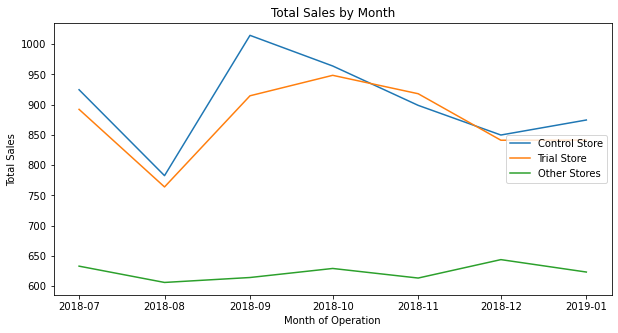

In [97]:
# Plot total sales by month for all 3 types of stores
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 5))
plt.plot(combineSales)
plt.title('Total Sales by Month')
plt.xlabel('Month of Operation')
plt.ylabel('Total Sales')
plt.legend(['Control Store', 'Trial Store', 'Other Stores'], loc = 5)

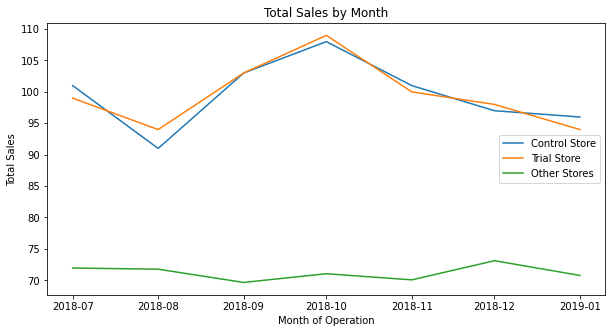

In [98]:
#Do same for no_Customer
# Now create 'totSales' visualisation for control store

# First create relevant dataframes 
controlSales = AfterSales.loc[AfterSales['store_type'] == 'Control Store', ['TransactionDate', 'no_Customer']]
controlSales.set_index('TransactionDate', inplace = True)
controlSales.rename(columns = {'avg_sale': 'Control Store'}, inplace = True)

 # Now create 'totSales' visualisation for Trial Store

TrailSales = AfterSales.loc[AfterSales['store_type'] == 'Trial Store', ['TransactionDate', 'no_Customer']]
TrailSales.set_index('TransactionDate', inplace = True)
TrailSales.rename(columns = {'avg_sale': 'Trial Store'}, inplace = True)

# Now create 'totSales' visualisation for Other Store

OtherSales = AfterSales.loc[AfterSales['store_type'] == 'Other Stores', ['TransactionDate', 'no_Customer']]
OtherSales = pd.DataFrame(OtherSales.groupby('TransactionDate').no_Customer.mean())
OtherSales.rename(columns = {'avg_sale': 'Other Stores'}, inplace = True) 

# Concatenate
combineSales= pd.concat([controlSales, TrailSales, OtherSales],axis =1)

# Plot total sales by month for all 3 types of stores
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 5))
plt.plot(combineSales)
plt.title('Total Sales by Month')
plt.xlabel('Month of Operation')
plt.ylabel('Total Sales')
plt.legend(['Control Store', 'Trial Store', 'Other Stores'], loc = 5)

In [99]:
#For scaling factor to applied to the control store
trial_sum = BeforeTrail.loc[BeforeTrail['store_type'] == 'Trial Store' , 'avg_sale'].sum()
control_sum = BeforeTrail.loc[BeforeTrail['store_type'] == 'Control Store' , 'avg_sale'].sum()
scaling_factor = trial_sum/control_sum
scaling_factor
# We compute this by dividing sum of 'totSales' for trial store by sum of 'totSales' for control store

0.9700651481287743

In [100]:
#
scaledControlSales = measureOverTime
scaledControlSales = scaledControlSales.loc[scaledControlSales['STORE_NBR'] == control_store]
scaledControlSales['controlSales'] = scaledControlSales['avg_sale'] * scaling_factor
scaledControlSales.head()

C:\Users\PRANIT~1.SHI\AppData\Local\Temp/ipykernel_2272/2872622206.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaledControlSales['controlSales'] = scaledControlSales['avg_sale'] * scaling_factor


,STORE_NBR,YearMonth,no_transaction,no_Customer,no_Packet,avg_sale,chips_qty,no_brand,trans_per_cust,TransactionDate,controlSales
1793,155,201807,123,101,250,924.6,23431,19,1.217822,2018-07-01,896.922236
1794,155,201808,119,91,229,782.7,21547,19,1.307692,2018-08-01,759.269991
1795,155,201809,144,103,290,1014.4,25983,19,1.398058,2018-09-01,984.034086
1796,155,201810,136,108,272,963.8,23949,19,1.259259,2018-10-01,934.948790
1797,155,201811,133,101,270,898.8,24720,20,1.316832,2018-11-01,871.894555


In [101]:
# Create 'percentageDiff' dataframe
percentDiff = scaledControlSales[['YearMonth', 'controlSales']]
percentDiff.reset_index(drop = True, inplace = True)


In [102]:
# Concatenate with trial store 'totSales'
trialSales = measureOverTime.loc[measureOverTime['STORE_NBR'] == trial_store, 'avg_sale']
trialSales.reset_index(drop = True, inplace = True)
percentDiff = pd.concat([percentDiff, trialSales], axis = 1)
percentDiff.rename(columns = {'avg_sale': 'trialSales'}, inplace = True)
percentDiff

,YearMonth,controlSales,trialSales
0,201807,896.922236,892.20
1,201808,759.269991,764.05
2,201809,984.034086,914.60
3,201810,934.948790,948.40
4,201811,871.894555,918.00
5,201812,824.361363,841.20
6,201901,848.418979,841.40
7,201902,864.522060,913.20
8,201903,780.320405,1026.80
9,201904,819.317024,848.20


In [103]:
# Calculate percentage difference and put it in a new column

percentDiff['percentDiff'] = abs(percentDiff.controlSales - percentDiff.trialSales) / percentDiff.controlSales
percentDiff

,YearMonth,controlSales,trialSales,percentDiff
0,201807,896.922236,892.20,0.005265
1,201808,759.269991,764.05,0.006296
2,201809,984.034086,914.60,0.070561
3,201810,934.948790,948.40,0.014387
4,201811,871.894555,918.00,0.052880
5,201812,824.361363,841.20,0.020426
6,201901,848.418979,841.40,0.008273
7,201902,864.522060,913.20,0.056306
8,201903,780.320405,1026.80,0.315870
9,201904,819.317024,848.20,0.035253


In [104]:
# Our null hypothesis is such that the trial period is the same as the pre-trial period
# Let's take the standard deviation based on the scaled percentage difference in the pre-trial period
from statistics import stdev
stdDev = stdev(percentDiff.loc[percentDiff['YearMonth'] < 201902, 'percentDiff'])
stdDev

0.025833952854772368

In [105]:
# Define the degrees of freedom
# Since we have 8 pre-trial months, dof = 8 - 1 = 7
dof = 7


In [106]:
# We will test with a null hypothesis of there being 0 difference between trial and control stores
# Create a new column for 'tValue'

percentDiff['tValue'] = (percentDiff['percentDiff'] - 0) / stdDev
percentDiff.loc[(percentDiff['YearMonth'] > 201901) & (percentDiff['YearMonth'] < 201905), 'tValue']


7     2.179542
8    12.226922
9     1.364580
Name: tValue, dtype: float64

In [107]:
# Find the 95th percentile of the t distribution with dof = 7
from scipy.stats import t
t.isf(0.05, dof)

# Comment: We can see that the t-value is much larger than the 95th percentile value of the t-distribution for March and April


1.8945786050613054

In [108]:
# Recall our 'scaledControlSales' dataframe

scaledControlSales.head()


,STORE_NBR,YearMonth,no_transaction,no_Customer,no_Packet,avg_sale,chips_qty,no_brand,trans_per_cust,TransactionDate,controlSales
1793,155,201807,123,101,250,924.6,23431,19,1.217822,2018-07-01,896.922236
1794,155,201808,119,91,229,782.7,21547,19,1.307692,2018-08-01,759.269991
1795,155,201809,144,103,290,1014.4,25983,19,1.398058,2018-09-01,984.034086
1796,155,201810,136,108,272,963.8,23949,19,1.259259,2018-10-01,934.948790
1797,155,201811,133,101,270,898.8,24720,20,1.316832,2018-11-01,871.894555


In [109]:
# Add a new column 'TransactionMonth' to 'scaledControlSales'

scaledControlSales['TransactionDate'] = pd.to_datetime(scaledControlSales['YearMonth'].astype(str), format = '%Y%m')
scaledControlSales


C:\Users\PRANIT~1.SHI\AppData\Local\Temp/ipykernel_2272/4293170942.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaledControlSales['TransactionDate'] = pd.to_datetime(scaledControlSales['YearMonth'].astype(str), format = '%Y%m')


,STORE_NBR,YearMonth,no_transaction,no_Customer,no_Packet,avg_sale,chips_qty,no_brand,trans_per_cust,TransactionDate,controlSales
1793,155,201807,123,101,250,924.60,23431,19,1.217822,2018-07-01,896.922236
1794,155,201808,119,91,229,782.70,21547,19,1.307692,2018-08-01,759.269991
1795,155,201809,144,103,290,1014.40,25983,19,1.398058,2018-09-01,984.034086
1796,155,201810,136,108,272,963.80,23949,19,1.259259,2018-10-01,934.948790
1797,155,201811,133,101,270,898.80,24720,20,1.316832,2018-11-01,871.894555
1798,155,201812,120,97,242,849.80,22919,20,1.237113,2018-12-01,824.361363
1799,155,201901,125,96,252,874.60,22363,19,1.302083,2019-01-01,848.418979
1800,155,201902,125,95,254,891.20,22395,20,1.315789,2019-02-01,864.522060
1801,155,201903,118,94,240,804.40,21319,19,1.255319,2019-03-01,780.320405
1802,155,201904,120,99,242,844.60,21339,20,1.212121,2019-04-01,819.317024


In [110]:
# Time for some visualisation
# First we need to create the appropriate dataframe
# Extract 'controlSales' from 'scaledControlSales' dataframe for control store 

controlSales = scaledControlSales.loc[:, ['TransactionDate', 'controlSales']]
controlSales.set_index('TransactionDate', inplace = True)
controlSales.rename(columns = {'controlSales': 'Control Sales'}, inplace = True)
controlSales

,Control Sales
TransactionDate,
2018-07-01,896.922236
2018-08-01,759.269991
2018-09-01,984.034086
2018-10-01,934.948790
2018-11-01,871.894555
2018-12-01,824.361363
2019-01-01,848.418979
2019-02-01,864.522060
2019-03-01,780.320405


In [111]:
# Recall 'measureOverTime' dataframe

measureOverTime.head()


,STORE_NBR,YearMonth,no_transaction,no_Customer,no_Packet,avg_sale,chips_qty,no_brand,trans_per_cust,TransactionDate
0,1,201807,52,49,62,206.9,9113,16,1.061224,2018-07-01
1,1,201808,43,42,54,176.1,7798,15,1.023810,2018-08-01
2,1,201809,62,59,75,278.8,11148,17,1.050847,2018-09-01
3,1,201810,45,44,58,188.1,7807,14,1.022727,2018-10-01
4,1,201811,47,46,57,192.6,8339,20,1.021739,2018-11-01


In [112]:
# Create a new column 'TransationDate' under 'measureOverTime' dataframe

measureOverTime['TransactionDate'] = pd.to_datetime(measureOverTime['YearMonth'].astype(str), format = '%Y%m')
measureOverTime.head()


C:\Users\PRANIT~1.SHI\AppData\Local\Temp/ipykernel_2272/4078677994.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  measureOverTime['TransactionDate'] = pd.to_datetime(measureOverTime['YearMonth'].astype(str), format = '%Y%m')


,STORE_NBR,YearMonth,no_transaction,no_Customer,no_Packet,avg_sale,chips_qty,no_brand,trans_per_cust,TransactionDate
0,1,201807,52,49,62,206.9,9113,16,1.061224,2018-07-01
1,1,201808,43,42,54,176.1,7798,15,1.023810,2018-08-01
2,1,201809,62,59,75,278.8,11148,17,1.050847,2018-09-01
3,1,201810,45,44,58,188.1,7807,14,1.022727,2018-10-01
4,1,201811,47,46,57,192.6,8339,20,1.021739,2018-11-01


In [113]:
# Extract 'totSales' for trial store from 'measureOverTime'

trialSales = measureOverTime.loc[measureOverTime['STORE_NBR'] == trial_store, ['TransactionDate', 'avg_sale']]
trialSales.set_index('TransactionDate', inplace = True)
trialSales.rename(columns = {'totSales': 'Trial Sales'}, inplace = True)
trialSales

,avg_sale
TransactionDate,
2018-07-01,892.20
2018-08-01,764.05
2018-09-01,914.60
2018-10-01,948.40
2018-11-01,918.00
2018-12-01,841.20
2019-01-01,841.40
2019-02-01,913.20
2019-03-01,1026.80


In [114]:
# Create two new columns under 'controlSales' which calculates the 5% and 95% confidence interval

controlSales['5% CI'] = controlSales['Control Sales'] * (1 - stdDev*2)
controlSales['95% CI'] = controlSales['Control Sales'] * (1 + stdDev*2)
controlSales


,Control Sales,5% CI,95% CI
TransactionDate,,,
2018-07-01,896.922236,850.580142,943.264329
2018-08-01,759.269991,720.040101,798.499882
2018-09-01,984.034086,933.191106,1034.877067
2018-10-01,934.948790,886.641944,983.255636
2018-11-01,871.894555,826.845589,916.943521
2018-12-01,824.361363,781.768338,866.954388
2019-01-01,848.418979,804.582947,892.255010
2019-02-01,864.522060,819.854016,909.190104
2019-03-01,780.320405,740.002884,820.637926


In [115]:
# Merge the two dataframes together 'controlSales' and 'trialSales'

combineSales = pd.merge(controlSales, trialSales, left_index = True, right_index = True)
combineSales


,Control Sales,5% CI,95% CI,avg_sale
TransactionDate,,,,
2018-07-01,896.922236,850.580142,943.264329,892.20
2018-08-01,759.269991,720.040101,798.499882,764.05
2018-09-01,984.034086,933.191106,1034.877067,914.60
2018-10-01,934.948790,886.641944,983.255636,948.40
2018-11-01,871.894555,826.845589,916.943521,918.00
2018-12-01,824.361363,781.768338,866.954388,841.20
2019-01-01,848.418979,804.582947,892.255010,841.40
2019-02-01,864.522060,819.854016,909.190104,913.20
2019-03-01,780.320405,740.002884,820.637926,1026.80


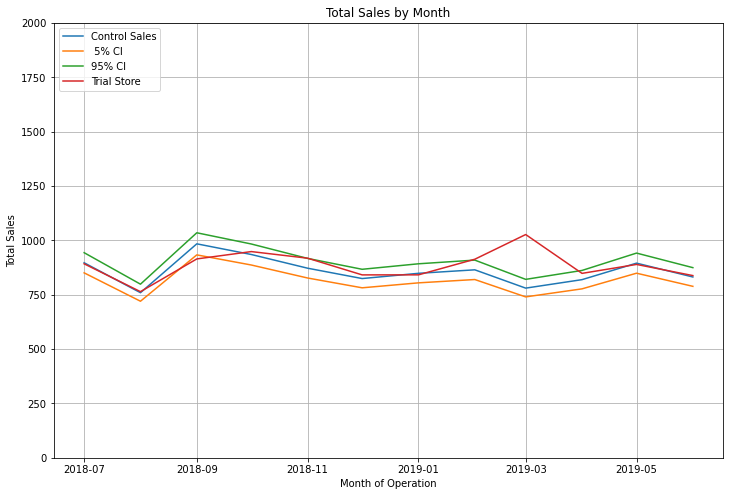

In [116]:
plt.figure(figsize = (12, 8))
plt.plot(combineSales)
plt.title('Total Sales by Month')
plt.xlabel('Month of Operation')
plt.ylabel('Total Sales')
plt.legend(['Control Sales', ' 5% CI', '95% CI', 'Trial Store'], loc = 2)
plt.ylim((0, 2000))
plt.grid()
plt.show()

when we look at the feb2019 and march 2019 we see high sales from controlstore 155, 
then those in CI for our trail store 86

In [117]:
# now letscompute the same forn  no of customer say ncustomers
trial_customers = BeforeTrail.loc[BeforeTrail['store_type'] == 'Trial Store' , 'no_Customer'].sum()
control_customers = BeforeTrail.loc[BeforeTrail['store_type'] == 'Control Store', 'no_Customer'].sum()
scalingFactor_Cust = trial_customers / control_customers
scalingFactor_Cust

1.0

In [118]:
scaledControlCustomers = measureOverTime
scaledControlCustomers = scaledControlCustomers.loc[scaledControlCustomers['STORE_NBR'] == control_store]
scaledControlCustomers['controlCustomers'] = scaledControlCustomers['no_Customer'] * scalingFactor_Cust
scaledControlCustomers.head()

C:\Users\PRANIT~1.SHI\AppData\Local\Temp/ipykernel_2272/2143537957.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaledControlCustomers['controlCustomers'] = scaledControlCustomers['no_Customer'] * scalingFactor_Cust


,STORE_NBR,YearMonth,no_transaction,no_Customer,no_Packet,avg_sale,chips_qty,no_brand,trans_per_cust,TransactionDate,controlCustomers
1793,155,201807,123,101,250,924.6,23431,19,1.217822,2018-07-01,101.0
1794,155,201808,119,91,229,782.7,21547,19,1.307692,2018-08-01,91.0
1795,155,201809,144,103,290,1014.4,25983,19,1.398058,2018-09-01,103.0
1796,155,201810,136,108,272,963.8,23949,19,1.259259,2018-10-01,108.0
1797,155,201811,133,101,270,898.8,24720,20,1.316832,2018-11-01,101.0


In [119]:
#To get number of trail and control store customer
# Create 'percentageDiff' dataframe
percentageDiff = scaledControlCustomers[['YearMonth', 'controlCustomers']]
percentageDiff.reset_index(drop = True, inplace = True)

# Concatenate with trial store 'nCustomers'
trialCustomers = measureOverTime.loc[measureOverTime['STORE_NBR'] == trial_store, 'no_Customer']
trialCustomers.reset_index(drop = True, inplace = True)
percentageDiff = pd.concat([percentageDiff, trialCustomers], axis = 1)
percentageDiff.rename(columns = {'no_Customer': 'trialCustomers'}, inplace = True)
percentageDiff

,YearMonth,controlCustomers,trialCustomers
0,201807,101.0,99
1,201808,91.0,94
2,201809,103.0,103
3,201810,108.0,109
4,201811,101.0,100
5,201812,97.0,98
6,201901,96.0,94
7,201902,95.0,107
8,201903,94.0,115
9,201904,99.0,105


In [120]:
# Calculate percentage difference and put it in a new column

percentageDiff['percentageDiff'] = abs(percentageDiff.controlCustomers - percentageDiff.trialCustomers) / percentageDiff.controlCustomers
percentageDiff


,YearMonth,controlCustomers,trialCustomers,percentageDiff
0,201807,101.0,99,0.019802
1,201808,91.0,94,0.032967
2,201809,103.0,103,0.000000
3,201810,108.0,109,0.009259
4,201811,101.0,100,0.009901
5,201812,97.0,98,0.010309
6,201901,96.0,94,0.020833
7,201902,95.0,107,0.126316
8,201903,94.0,115,0.223404
9,201904,99.0,105,0.060606


In [121]:
# Our null hypothesis is such that the trial period is the same as the pre-trial period
# Let's take the standard deviation based on the scaled percentage difference in the pre-trial period

stdDev = stdev(percentageDiff.loc[percentageDiff['YearMonth'] < 201902, 'percentageDiff'])
stdDev


0.010687444701395236

In [122]:
dof = 7
# We will test with a null hypothesis of there being 0 difference between trial and control stores
# Create a new column for 'tValue'

percentageDiff['tValue'] = (percentageDiff['percentageDiff'] - 0) / stdDev

percentageDiff.loc[(percentageDiff['YearMonth'] > 201901) & (percentageDiff['YearMonth'] < 201905), 'tValue']


7    11.819082
8    20.903430
9     5.670772
Name: tValue, dtype: float64

In [123]:
t.isf(0.05, dof)


1.8945786050613054

In [124]:
# Time for some visualisation
# First we need to create the appropriate dataframe
# Extract 'controlCustomers' from 'scaledControlCustomers' dataframe for control store 

controlCustomers = scaledControlCustomers.loc[:, ['TransactionDate', 'controlCustomers']]
controlCustomers.set_index('TransactionDate', inplace = True)
controlCustomers.rename(columns = {'controlCustomers': 'Control Customers'}, inplace = True)
controlCustomers


,Control Customers
TransactionDate,
2018-07-01,101.0
2018-08-01,91.0
2018-09-01,103.0
2018-10-01,108.0
2018-11-01,101.0
2018-12-01,97.0
2019-01-01,96.0
2019-02-01,95.0
2019-03-01,94.0


In [125]:
# Extract 'nCustomers' for trial store from 'measureOverTime'

trialCustomers = measureOverTime.loc[measureOverTime['STORE_NBR'] == trial_store, ['TransactionDate', 'no_Customer']]
trialCustomers.set_index('TransactionDate', inplace = True)
trialCustomers.rename(columns = {'no_Customer': 'Trial Customers'}, inplace = True)
trialCustomers


,Trial Customers
TransactionDate,
2018-07-01,99
2018-08-01,94
2018-09-01,103
2018-10-01,109
2018-11-01,100
2018-12-01,98
2019-01-01,94
2019-02-01,107
2019-03-01,115


In [126]:
controlCustomers['5%CI'] = controlCustomers['Control Customers'] * (1 - stdDev*2)
controlCustomers['95% CI'] = controlCustomers['Control Customers'] * (1 + stdDev*2)
controlCustomers


,Control Customers,5%CI,95% CI
TransactionDate,,,
2018-07-01,101.0,98.841136,103.158864
2018-08-01,91.0,89.054885,92.945115
2018-09-01,103.0,100.798386,105.201614
2018-10-01,108.0,105.691512,110.308488
2018-11-01,101.0,98.841136,103.158864
2018-12-01,97.0,94.926636,99.073364
2019-01-01,96.0,93.948011,98.051989
2019-02-01,95.0,92.969386,97.030614
2019-03-01,94.0,91.990760,96.009240


In [127]:
# Merge the two dataframes together 'controlSales' and 'trialSales'

combineCustomers = pd.merge(controlCustomers, trialCustomers, left_index = True, right_index = True)
combineCustomers


,Control Customers,5%CI,95% CI,Trial Customers
TransactionDate,,,,
2018-07-01,101.0,98.841136,103.158864,99
2018-08-01,91.0,89.054885,92.945115,94
2018-09-01,103.0,100.798386,105.201614,103
2018-10-01,108.0,105.691512,110.308488,109
2018-11-01,101.0,98.841136,103.158864,100
2018-12-01,97.0,94.926636,99.073364,98
2019-01-01,96.0,93.948011,98.051989,94
2019-02-01,95.0,92.969386,97.030614,107
2019-03-01,94.0,91.990760,96.009240,115


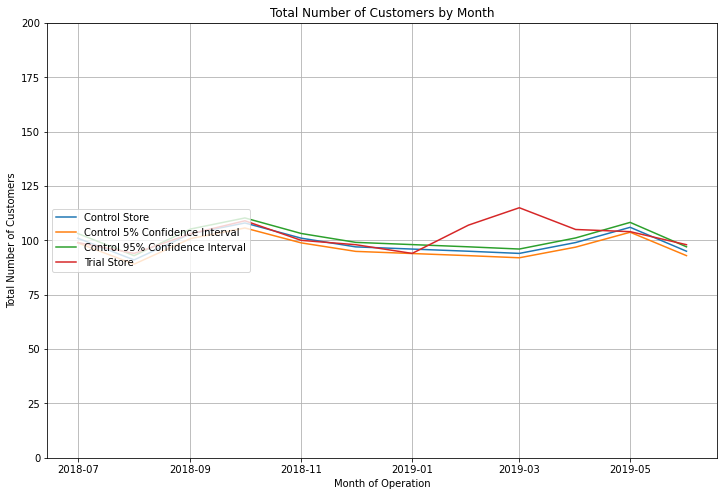

In [128]:
plt.figure(figsize = (12, 8))
plt.plot(combineCustomers)

# Set graph title and axis title
plt.title('Total Number of Customers by Month')
plt.xlabel('Month of Operation')
plt.ylabel('Total Number of Customers')

# Set legend
plt.legend(['Control Store', 'Control 5% Confidence Interval', 'Control 95% Confidence Interval', 'Trial Store'], loc = 6)

# Set new y-axis limit
plt.ylim((0, 200))


# Set grid
plt.grid()
plt.show()


In [129]:
#Agan in terms of number of customers, the control store has higher number in feb 2019 to april 2019.

# Store 88

In [130]:
trial_store = 88
corr_nSales = calculateCorrelation(BeforeTrail, 'avg_sale', trial_store)
corr_nCustomers = calculateCorrelation(BeforeTrail, 'no_Customer', trial_store)

corr_nSales
#corr_nCustomers

,Store1,Store2,Correlation
0,88.0,1.0,0.813636
1,88.0,2.0,-0.067927
2,88.0,3.0,-0.507847
3,88.0,4.0,-0.745566
4,88.0,5.0,0.190330
...,...,...,...
255,88.0,268.0,-0.021429
256,88.0,269.0,-0.172578
257,88.0,270.0,-0.723272
258,88.0,271.0,-0.103037


In [131]:
# Compute magnitude with trial store 88
magnitude_nSales = calculateMagnitudeDistance(BeforeTrail, 'avg_sale', trial_store)
magnitude_nCustomers = calculateMagnitudeDistance(BeforeTrail, 'no_Customer', trial_store)
magnitude_nSales
#magnitude_nCustomers

,Store1,Store2,Magnitude
0,88.0,1.0,0.548959
1,88.0,2.0,0.541212
2,88.0,3.0,0.458109
3,88.0,4.0,0.484447
4,88.0,5.0,0.496409
...,...,...,...
255,88.0,268.0,0.522847
256,88.0,269.0,0.564856
257,88.0,270.0,0.513329
258,88.0,271.0,0.429220


In [132]:
#Concatenate Corr and magnitute for sales.
score_nSales = pd.concat([corr_nSales, magnitude_nSales['Magnitude']], axis = 1)
score_nSales

,Store1,Store2,Correlation,Magnitude
0,88.0,1.0,0.813636,0.548959
1,88.0,2.0,-0.067927,0.541212
2,88.0,3.0,-0.507847,0.458109
3,88.0,4.0,-0.745566,0.484447
4,88.0,5.0,0.190330,0.496409
...,...,...,...,...
255,88.0,268.0,-0.021429,0.522847
256,88.0,269.0,-0.172578,0.564856
257,88.0,270.0,-0.723272,0.513329
258,88.0,271.0,-0.103037,0.429220


In [133]:
# Add an additional column which calculates the weighted average

corr_weight = 0.5
score_nSales['scoreNSales'] = corr_weight * score_nSales['Correlation'] + (1 - corr_weight) * score_nSales['Magnitude']

In [134]:
# Now do the same for 'nCustomers'

score_nCustomers = pd.concat([corr_nCustomers, magnitude_nCustomers['Magnitude']], axis = 1)
score_nCustomers

,Store1,Store2,Correlation,Magnitude
0,88.0,1.0,0.305334,0.357143
1,88.0,2.0,-0.452379,0.285714
2,88.0,3.0,0.522884,0.683673
3,88.0,4.0,-0.361503,0.577922
4,88.0,5.0,-0.025320,0.558442
...,...,...,...,...
255,88.0,268.0,0.672672,0.630252
256,88.0,269.0,-0.274781,0.360902
257,88.0,270.0,-0.103032,0.367965
258,88.0,271.0,-0.018831,0.655844


In [135]:
# Add an additional column which calculates the weighted average

corr_weight = 0.5
score_nCustomers['scoreNCustomers'] = corr_weight * score_nCustomers['Correlation'] + (1 - corr_weight) * score_nCustomers['Magnitude']
score_nCustomers.head()


,Store1,Store2,Correlation,Magnitude,scoreNCustomers
0,88.0,1.0,0.305334,0.357143,0.331238
1,88.0,2.0,-0.452379,0.285714,-0.083332
2,88.0,3.0,0.522884,0.683673,0.603279
3,88.0,4.0,-0.361503,0.577922,0.108210
4,88.0,5.0,-0.025320,0.558442,0.266561


In [136]:
# Index both 'score_nSales' and 'score_nCustomers' dataframe

score_nSales.set_index(['Store1', 'Store2'], inplace = True)
score_nCustomers.set_index(['Store1', 'Store2'], inplace = True)


In [137]:
# Create a new dataframe 'score_Control' which takes the average of 'scoreNSales' and 'scoreNCust'

score_Control = pd.concat([score_nSales['scoreNSales'], score_nCustomers['scoreNCustomers']], axis = 1)
score_Control

scoreNSales  scoreNCustomers
Store1 Store2                              
88.0   1.0        0.681297         0.331238
       2.0        0.236643        -0.083332
       3.0       -0.024869         0.603279
       4.0       -0.130559         0.108210
       5.0        0.343370         0.266561
...                    ...              ...
       268.0      0.250709         0.651462
       269.0      0.196139         0.043061
       270.0     -0.104971         0.132467
       271.0      0.163091         0.318507
       272.0     -0.077482         0.237944

[260 rows x 2 columns]

In [138]:
# Add a new column to 'score_Control' which computes the average of 'scoreNSales' and 'scoreNCust'

score_Control['finalControlScore'] = 0.5 * (score_Control['scoreNSales'] + score_Control['scoreNCustomers'])
score_Control.head()


scoreNSales  scoreNCustomers  finalControlScore
Store1 Store2                                                 
88.0   1.0        0.681297         0.331238           0.506268
       2.0        0.236643        -0.083332           0.076655
       3.0       -0.024869         0.603279           0.289205
       4.0       -0.130559         0.108210          -0.011175
       5.0        0.343370         0.266561           0.304965

In [139]:
# Let's see the top 5 stores with highest 'finalControlScore'

score_Control.sort_values(by = 'finalControlScore', ascending = False).head()

# Comment: store  matches trial store 86 the most 


scoreNSales  scoreNCustomers  finalControlScore
Store1 Store2                                                 
88.0   178.0      0.650803         0.707828           0.679316
       14.0       0.646064         0.685774           0.665919
       134.0      0.775084         0.540154           0.657619
       237.0      0.451974         0.777235           0.614604
       187.0      0.616752         0.594560           0.605656

In [140]:
# Set store 88 as 'control_store'
# After doing some visualisations, found that stores 178, 14 and 134 do not match trial store so set store 237 as control store

control_store = 237
# Create a new dataframe 'AfterSales'
AfterSales = BeforeTrail

# Create a new column within 'AfterSales' which categorises store type
store_type = []

for i in AfterSales['STORE_NBR']:
    if i == trial_store:
        store_type.append('Trial Store')
    elif i == control_store:
        store_type.append('Control Store')
    else:
        store_type.append('Other Stores')

AfterSales['store_type'] = store_type
AfterSales.head()


C:\Users\PRANIT~1.SHI\AppData\Local\Temp/ipykernel_2272/2936797327.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AfterSales['store_type'] = store_type


,STORE_NBR,YearMonth,no_transaction,no_Customer,no_Packet,avg_sale,chips_qty,no_brand,trans_per_cust,store_type,TransactionDate
0,1,201807,52,49,62,206.9,9113,16,1.061224,Other Stores,2018-07-01
1,1,201808,43,42,54,176.1,7798,15,1.023810,Other Stores,2018-08-01
2,1,201809,62,59,75,278.8,11148,17,1.050847,Other Stores,2018-09-01
3,1,201810,45,44,58,188.1,7807,14,1.022727,Other Stores,2018-10-01
4,1,201811,47,46,57,192.6,8339,20,1.021739,Other Stores,2018-11-01


In [141]:
#Yearmonth is in intt64format we need it in date time format
AfterSales['TransactionDate'] = pd.to_datetime(AfterSales['YearMonth'].astype(str), format = '%Y%m')
AfterSales

C:\Users\PRANIT~1.SHI\AppData\Local\Temp/ipykernel_2272/4102911305.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AfterSales['TransactionDate'] = pd.to_datetime(AfterSales['YearMonth'].astype(str), format = '%Y%m')


,STORE_NBR,YearMonth,no_transaction,no_Customer,no_Packet,avg_sale,chips_qty,no_brand,trans_per_cust,store_type,TransactionDate
0,1,201807,52,49,62,206.9,9113,16,1.061224,Other Stores,2018-07-01
1,1,201808,43,42,54,176.1,7798,15,1.023810,Other Stores,2018-08-01
2,1,201809,62,59,75,278.8,11148,17,1.050847,Other Stores,2018-09-01
3,1,201810,45,44,58,188.1,7807,14,1.022727,Other Stores,2018-10-01
4,1,201811,47,46,57,192.6,8339,20,1.021739,Other Stores,2018-11-01
...,...,...,...,...,...,...,...,...,...,...,...
3159,272,201809,36,32,71,304.7,6706,13,1.125000,Other Stores,2018-09-01
3160,272,201810,50,44,99,430.6,9488,12,1.136364,Other Stores,2018-10-01
3161,272,201811,45,41,87,376.2,8617,10,1.097561,Other Stores,2018-11-01
3162,272,201812,47,47,89,403.9,9520,13,1.000000,Other Stores,2018-12-01


In [142]:
# Now create 'totSales' visualisation for control store

# First create relevant dataframes 
controlSales = AfterSales.loc[AfterSales['store_type'] == 'Control Store', ['TransactionDate', 'avg_sale']]
controlSales.set_index('TransactionDate', inplace = True)
controlSales.rename(columns = {'avg_sale': 'Control Store'}, inplace = True)

In [143]:
 # Now create 'totSales' visualisation for Trial Store

TrailSales = AfterSales.loc[AfterSales['store_type'] == 'Trial Store', ['TransactionDate', 'avg_sale']]
TrailSales.set_index('TransactionDate', inplace = True)
TrailSales.rename(columns = {'avg_sale': 'Trial Store'}, inplace = True)

In [144]:

# Now create 'totSales' visualisation for Other Store

OtherSales = AfterSales.loc[AfterSales['store_type'] == 'Other Stores', ['TransactionDate', 'avg_sale']]
OtherSales = pd.DataFrame(OtherSales.groupby('TransactionDate').avg_sale.mean())
OtherSales.rename(columns = {'avg_sale': 'Other Stores'}, inplace = True) 

In [145]:
# Concatenate
combineSales= pd.concat([controlSales, TrailSales, OtherSales],axis =1)

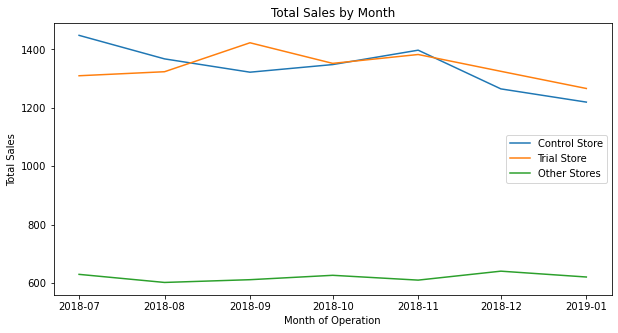

In [146]:
# Plot total sales by month for all 3 types of stores
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 5))
plt.plot(combineSales)
plt.title('Total Sales by Month')
plt.xlabel('Month of Operation')
plt.ylabel('Total Sales')
plt.legend(['Control Store', 'Trial Store', 'Other Stores'], loc = 5)

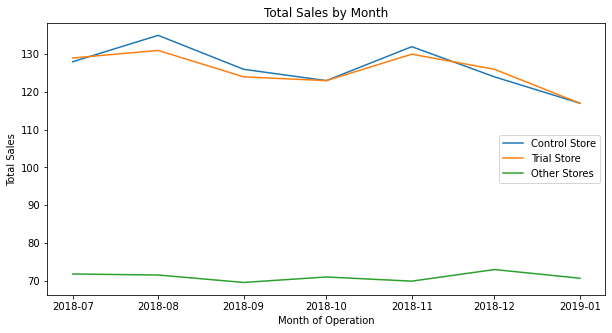

In [147]:
#Do same for no_Customer
# Now create 'totSales' visualisation for control store

# First create relevant dataframes 
controlSales = AfterSales.loc[AfterSales['store_type'] == 'Control Store', ['TransactionDate', 'no_Customer']]
controlSales.set_index('TransactionDate', inplace = True)
controlSales.rename(columns = {'avg_sale': 'Control Store'}, inplace = True)

 # Now create 'totSales' visualisation for Trial Store

TrailSales = AfterSales.loc[AfterSales['store_type'] == 'Trial Store', ['TransactionDate', 'no_Customer']]
TrailSales.set_index('TransactionDate', inplace = True)
TrailSales.rename(columns = {'avg_sale': 'Trial Store'}, inplace = True)

# Now create 'totSales' visualisation for Other Store

OtherSales = AfterSales.loc[AfterSales['store_type'] == 'Other Stores', ['TransactionDate', 'no_Customer']]
OtherSales = pd.DataFrame(OtherSales.groupby('TransactionDate').no_Customer.mean())
OtherSales.rename(columns = {'avg_sale': 'Other Stores'}, inplace = True) 

# Concatenate
combineSales= pd.concat([controlSales, TrailSales, OtherSales],axis =1)

# Plot total sales by month for all 3 types of stores
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 5))
plt.plot(combineSales)
plt.title('Total Sales by Month')
plt.xlabel('Month of Operation')
plt.ylabel('Total Sales')
plt.legend(['Control Store', 'Trial Store', 'Other Stores'], loc = 5)

In [148]:
#For scaling factor to applied to the control store
trial_sum = BeforeTrail.loc[BeforeTrail['store_type'] == 'Trial Store' , 'avg_sale'].sum()
control_sum = BeforeTrail.loc[BeforeTrail['store_type'] == 'Control Store' , 'avg_sale'].sum()
scaling_factor = trial_sum/control_sum
scaling_factor
# We compute this by dividing sum of 'totSales' for trial store by sum of 'totSales' for control store

1.001558330664959

In [149]:
#
scaledControlSales = measureOverTime
scaledControlSales = scaledControlSales.loc[scaledControlSales['STORE_NBR'] == control_store]
scaledControlSales['controlSales'] = scaledControlSales['avg_sale'] * scaling_factor
scaledControlSales.head()

C:\Users\PRANIT~1.SHI\AppData\Local\Temp/ipykernel_2272/2872622206.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaledControlSales['controlSales'] = scaledControlSales['avg_sale'] * scaling_factor


,STORE_NBR,YearMonth,no_transaction,no_Customer,no_Packet,avg_sale,chips_qty,no_brand,trans_per_cust,TransactionDate,controlSales
2747,237,201807,162,128,324,1448.4,30818,13,1.265625,2018-07-01,1450.657086
2748,237,201808,165,135,313,1367.8,29041,13,1.222222,2018-08-01,1369.931485
2749,237,201809,149,126,299,1322.2,28225,12,1.182540,2018-09-01,1324.260425
2750,237,201810,147,123,299,1348.3,28771,13,1.195122,2018-10-01,1350.401097
2751,237,201811,161,132,320,1397.6,29495,13,1.219697,2018-11-01,1399.777923


In [150]:
# Create 'percentageDiff' dataframe
percentDiff = scaledControlSales[['YearMonth', 'controlSales']]
percentDiff.reset_index(drop = True, inplace = True)


In [151]:
# Concatenate with trial store 'totSales'
trialSales = measureOverTime.loc[measureOverTime['STORE_NBR'] == trial_store, 'avg_sale']
trialSales.reset_index(drop = True, inplace = True)
percentDiff = pd.concat([percentDiff, trialSales], axis = 1)
percentDiff.rename(columns = {'avg_sale': 'trialSales'}, inplace = True)
percentDiff

,YearMonth,controlSales,trialSales
0,201807,1450.657086,1310.00
1,201808,1369.931485,1323.80
2,201809,1324.260425,1423.00
3,201810,1350.401097,1352.40
4,201811,1399.777923,1382.80
5,201812,1266.971288,1325.20
6,201901,1221.600696,1266.40
7,201902,1406.989143,1370.20
8,201903,1210.082775,1477.20
9,201904,1206.477165,1439.40


In [152]:
# Calculate percentage difference and put it in a new column

percentDiff['percentDiff'] = abs(percentDiff.controlSales - percentDiff.trialSales) / percentDiff.controlSales
percentDiff

,YearMonth,controlSales,trialSales,percentDiff
0,201807,1450.657086,1310.00,0.096961
1,201808,1369.931485,1323.80,0.033674
2,201809,1324.260425,1423.00,0.074562
3,201810,1350.401097,1352.40,0.001480
4,201811,1399.777923,1382.80,0.012129
5,201812,1266.971288,1325.20,0.045959
6,201901,1221.600696,1266.40,0.036673
7,201902,1406.989143,1370.20,0.026147
8,201903,1210.082775,1477.20,0.220743
9,201904,1206.477165,1439.40,0.193060


In [153]:
# Our null hypothesis is such that the trial period is the same as the pre-trial period
# Let's take the standard deviation based on the scaled percentage difference in the pre-trial period
from statistics import stdev
stdDev = stdev(percentDiff.loc[percentDiff['YearMonth'] < 201902, 'percentDiff'])
stdDev

0.0334678673030788

In [154]:
# Define the degrees of freedom
# Since we have 8 pre-trial months, dof = 8 - 1 = 7
dof = 7


In [155]:
# We will test with a null hypothesis of there being 0 difference between trial and control stores
# Create a new column for 'tValue'

percentDiff['tValue'] = (percentDiff['percentDiff'] - 0) / stdDev
percentDiff.loc[(percentDiff['YearMonth'] > 201901) & (percentDiff['YearMonth'] < 201905), 'tValue']


7    0.781270
8    6.595668
9    5.768527
Name: tValue, dtype: float64

In [156]:
# Find the 95th percentile of the t distribution with dof = 7
from scipy.stats import t
t.isf(0.05, dof)

# Comment: We can see that the t-value is much larger than the 95th percentile value of the t-distribution for March and April


1.8945786050613054

In [157]:
# Recall our 'scaledControlSales' dataframe

scaledControlSales.head()


,STORE_NBR,YearMonth,no_transaction,no_Customer,no_Packet,avg_sale,chips_qty,no_brand,trans_per_cust,TransactionDate,controlSales
2747,237,201807,162,128,324,1448.4,30818,13,1.265625,2018-07-01,1450.657086
2748,237,201808,165,135,313,1367.8,29041,13,1.222222,2018-08-01,1369.931485
2749,237,201809,149,126,299,1322.2,28225,12,1.182540,2018-09-01,1324.260425
2750,237,201810,147,123,299,1348.3,28771,13,1.195122,2018-10-01,1350.401097
2751,237,201811,161,132,320,1397.6,29495,13,1.219697,2018-11-01,1399.777923


In [158]:
# Add a new column 'TransactionMonth' to 'scaledControlSales'

scaledControlSales['TransactionDate'] = pd.to_datetime(scaledControlSales['YearMonth'].astype(str), format = '%Y%m')
scaledControlSales


C:\Users\PRANIT~1.SHI\AppData\Local\Temp/ipykernel_2272/4293170942.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaledControlSales['TransactionDate'] = pd.to_datetime(scaledControlSales['YearMonth'].astype(str), format = '%Y%m')


,STORE_NBR,YearMonth,no_transaction,no_Customer,no_Packet,avg_sale,chips_qty,no_brand,trans_per_cust,TransactionDate,controlSales
2747,237,201807,162,128,324,1448.4,30818,13,1.265625,2018-07-01,1450.657086
2748,237,201808,165,135,313,1367.8,29041,13,1.222222,2018-08-01,1369.931485
2749,237,201809,149,126,299,1322.2,28225,12,1.182540,2018-09-01,1324.260425
2750,237,201810,147,123,299,1348.3,28771,13,1.195122,2018-10-01,1350.401097
2751,237,201811,161,132,320,1397.6,29495,13,1.219697,2018-11-01,1399.777923
2752,237,201812,144,124,289,1265.0,25887,13,1.161290,2018-12-01,1266.971288
2753,237,201901,139,117,277,1219.7,26651,13,1.188034,2019-01-01,1221.600696
2754,237,201902,157,126,314,1404.8,31379,13,1.246032,2019-02-01,1406.989143
2755,237,201903,134,119,274,1208.2,25670,13,1.126050,2019-03-01,1210.082775
2756,237,201904,135,120,272,1204.6,26721,13,1.125000,2019-04-01,1206.477165


In [159]:
# Time for some visualisation
# First we need to create the appropriate dataframe
# Extract 'controlSales' from 'scaledControlSales' dataframe for control store 

controlSales = scaledControlSales.loc[:, ['TransactionDate', 'controlSales']]
controlSales.set_index('TransactionDate', inplace = True)
controlSales.rename(columns = {'controlSales': 'Control Sales'}, inplace = True)
controlSales

,Control Sales
TransactionDate,
2018-07-01,1450.657086
2018-08-01,1369.931485
2018-09-01,1324.260425
2018-10-01,1350.401097
2018-11-01,1399.777923
2018-12-01,1266.971288
2019-01-01,1221.600696
2019-02-01,1406.989143
2019-03-01,1210.082775


In [160]:
# Recall 'measureOverTime' dataframe

measureOverTime.head()


,STORE_NBR,YearMonth,no_transaction,no_Customer,no_Packet,avg_sale,chips_qty,no_brand,trans_per_cust,TransactionDate
0,1,201807,52,49,62,206.9,9113,16,1.061224,2018-07-01
1,1,201808,43,42,54,176.1,7798,15,1.023810,2018-08-01
2,1,201809,62,59,75,278.8,11148,17,1.050847,2018-09-01
3,1,201810,45,44,58,188.1,7807,14,1.022727,2018-10-01
4,1,201811,47,46,57,192.6,8339,20,1.021739,2018-11-01


In [161]:
# Create a new column 'TransationDate' under 'measureOverTime' dataframe

measureOverTime['TransactionDate'] = pd.to_datetime(measureOverTime['YearMonth'].astype(str), format = '%Y%m')
measureOverTime.head()


C:\Users\PRANIT~1.SHI\AppData\Local\Temp/ipykernel_2272/4078677994.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  measureOverTime['TransactionDate'] = pd.to_datetime(measureOverTime['YearMonth'].astype(str), format = '%Y%m')


,STORE_NBR,YearMonth,no_transaction,no_Customer,no_Packet,avg_sale,chips_qty,no_brand,trans_per_cust,TransactionDate
0,1,201807,52,49,62,206.9,9113,16,1.061224,2018-07-01
1,1,201808,43,42,54,176.1,7798,15,1.023810,2018-08-01
2,1,201809,62,59,75,278.8,11148,17,1.050847,2018-09-01
3,1,201810,45,44,58,188.1,7807,14,1.022727,2018-10-01
4,1,201811,47,46,57,192.6,8339,20,1.021739,2018-11-01


In [162]:
# Extract 'totSales' for trial store from 'measureOverTime'

trialSales = measureOverTime.loc[measureOverTime['STORE_NBR'] == trial_store, ['TransactionDate', 'avg_sale']]
trialSales.set_index('TransactionDate', inplace = True)
trialSales.rename(columns = {'totSales': 'Trial Sales'}, inplace = True)
trialSales

,avg_sale
TransactionDate,
2018-07-01,1310.00
2018-08-01,1323.80
2018-09-01,1423.00
2018-10-01,1352.40
2018-11-01,1382.80
2018-12-01,1325.20
2019-01-01,1266.40
2019-02-01,1370.20
2019-03-01,1477.20


In [163]:
# Create two new columns under 'controlSales' which calculates the 5% and 95% confidence interval

controlSales['5% CI'] = controlSales['Control Sales'] * (1 - stdDev*2)
controlSales['95% CI'] = controlSales['Control Sales'] * (1 + stdDev*2)
controlSales


,Control Sales,5% CI,95% CI
TransactionDate,,,
2018-07-01,1450.657086,1353.556288,1547.757884
2018-08-01,1369.931485,1278.234114,1461.628855
2018-09-01,1324.260425,1235.620080,1412.900769
2018-10-01,1350.401097,1260.011008,1440.791187
2018-11-01,1399.777923,1306.082759,1493.473086
2018-12-01,1266.971288,1182.165634,1351.776942
2019-01-01,1221.600696,1139.831956,1303.369436
2019-02-01,1406.989143,1312.811291,1501.166995
2019-03-01,1210.082775,1129.084996,1291.080555


In [164]:
# Merge the two dataframes together 'controlSales' and 'trialSales'

combineSales = pd.merge(controlSales, trialSales, left_index = True, right_index = True)
combineSales


,Control Sales,5% CI,95% CI,avg_sale
TransactionDate,,,,
2018-07-01,1450.657086,1353.556288,1547.757884,1310.00
2018-08-01,1369.931485,1278.234114,1461.628855,1323.80
2018-09-01,1324.260425,1235.620080,1412.900769,1423.00
2018-10-01,1350.401097,1260.011008,1440.791187,1352.40
2018-11-01,1399.777923,1306.082759,1493.473086,1382.80
2018-12-01,1266.971288,1182.165634,1351.776942,1325.20
2019-01-01,1221.600696,1139.831956,1303.369436,1266.40
2019-02-01,1406.989143,1312.811291,1501.166995,1370.20
2019-03-01,1210.082775,1129.084996,1291.080555,1477.20


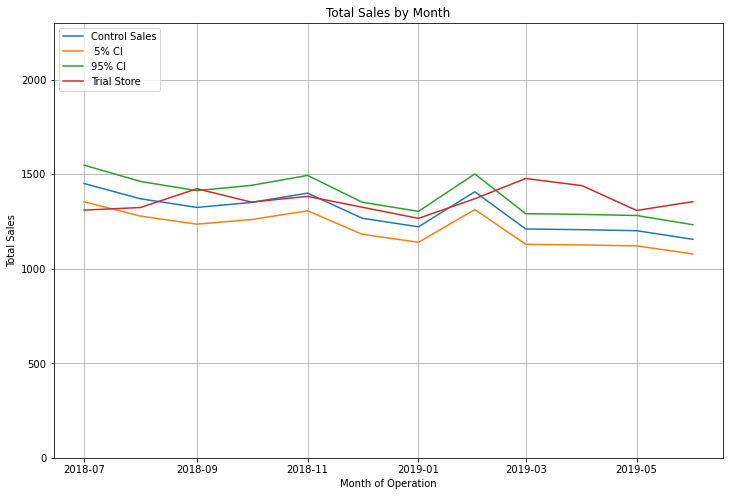

In [165]:
plt.figure(figsize = (12, 8))
plt.plot(combineSales)
plt.title('Total Sales by Month')
plt.xlabel('Month of Operation')
plt.ylabel('Total Sales')
plt.legend(['Control Sales', ' 5% CI', '95% CI', 'Trial Store'], loc = 2)
plt.ylim((0, 2300))
plt.grid()
plt.show()

when we look at the feb2019 and march 2019 we see high sales from controlstore 155, 
then those in CI for our trail store 86

In [166]:
# now letscompute the same forn  no of customer say ncustomers
trial_customers = BeforeTrail.loc[BeforeTrail['store_type'] == 'Trial Store' , 'no_Customer'].sum()
control_customers = BeforeTrail.loc[BeforeTrail['store_type'] == 'Control Store', 'no_Customer'].sum()
scalingFactor_Cust = trial_customers / control_customers
scalingFactor_Cust

0.9943502824858758

In [167]:
scaledControlCustomers = measureOverTime
scaledControlCustomers = scaledControlCustomers.loc[scaledControlCustomers['STORE_NBR'] == control_store]
scaledControlCustomers['controlCustomers'] = scaledControlCustomers['no_Customer'] * scalingFactor_Cust
scaledControlCustomers.head()

C:\Users\PRANIT~1.SHI\AppData\Local\Temp/ipykernel_2272/2143537957.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaledControlCustomers['controlCustomers'] = scaledControlCustomers['no_Customer'] * scalingFactor_Cust


,STORE_NBR,YearMonth,no_transaction,no_Customer,no_Packet,avg_sale,chips_qty,no_brand,trans_per_cust,TransactionDate,controlCustomers
2747,237,201807,162,128,324,1448.4,30818,13,1.265625,2018-07-01,127.276836
2748,237,201808,165,135,313,1367.8,29041,13,1.222222,2018-08-01,134.237288
2749,237,201809,149,126,299,1322.2,28225,12,1.182540,2018-09-01,125.288136
2750,237,201810,147,123,299,1348.3,28771,13,1.195122,2018-10-01,122.305085
2751,237,201811,161,132,320,1397.6,29495,13,1.219697,2018-11-01,131.254237


In [168]:
#To get number of trail and control store customer
# Create 'percentageDiff' dataframe
percentageDiff = scaledControlCustomers[['YearMonth', 'controlCustomers']]
percentageDiff.reset_index(drop = True, inplace = True)

# Concatenate with trial store 'nCustomers'
trialCustomers = measureOverTime.loc[measureOverTime['STORE_NBR'] == trial_store, 'no_Customer']
trialCustomers.reset_index(drop = True, inplace = True)
percentageDiff = pd.concat([percentageDiff, trialCustomers], axis = 1)
percentageDiff.rename(columns = {'no_Customer': 'trialCustomers'}, inplace = True)
percentageDiff

,YearMonth,controlCustomers,trialCustomers
0,201807,127.276836,129
1,201808,134.237288,131
2,201809,125.288136,124
3,201810,122.305085,123
4,201811,131.254237,130
5,201812,123.299435,126
6,201901,116.338983,117
7,201902,125.288136,124
8,201903,118.327684,134
9,201904,119.322034,128


In [169]:
# Calculate percentage difference and put it in a new column

percentageDiff['percentageDiff'] = abs(percentageDiff.controlCustomers - percentageDiff.trialCustomers) / percentageDiff.controlCustomers
percentageDiff


,YearMonth,controlCustomers,trialCustomers,percentageDiff
0,201807,127.276836,129,0.013539
1,201808,134.237288,131,0.024116
2,201809,125.288136,124,0.010281
3,201810,122.305085,123,0.005682
4,201811,131.254237,130,0.009556
5,201812,123.299435,126,0.021902
6,201901,116.338983,117,0.005682
7,201902,125.288136,124,0.010281
8,201903,118.327684,134,0.132448
9,201904,119.322034,128,0.072727


In [170]:
# Our null hypothesis is such that the trial period is the same as the pre-trial period
# Let's take the standard deviation based on the scaled percentage difference in the pre-trial period

stdDev = stdev(percentageDiff.loc[percentageDiff['YearMonth'] < 201902, 'percentageDiff'])
stdDev


0.00741024435207507

In [171]:
dof = 7
# We will test with a null hypothesis of there being 0 difference between trial and control stores
# Create a new column for 'tValue'

percentageDiff['tValue'] = (percentageDiff['percentageDiff'] - 0) / stdDev

percentageDiff.loc[(percentageDiff['YearMonth'] > 201901) & (percentageDiff['YearMonth'] < 201905), 'tValue']


7     1.387456
8    17.873693
9     9.814423
Name: tValue, dtype: float64

In [172]:
t.isf(0.05, dof)


1.8945786050613054

In [173]:
# Time for some visualisation
# First we need to create the appropriate dataframe
# Extract 'controlCustomers' from 'scaledControlCustomers' dataframe for control store 

controlCustomers = scaledControlCustomers.loc[:, ['TransactionDate', 'controlCustomers']]
controlCustomers.set_index('TransactionDate', inplace = True)
controlCustomers.rename(columns = {'controlCustomers': 'Control Customers'}, inplace = True)
controlCustomers


,Control Customers
TransactionDate,
2018-07-01,127.276836
2018-08-01,134.237288
2018-09-01,125.288136
2018-10-01,122.305085
2018-11-01,131.254237
2018-12-01,123.299435
2019-01-01,116.338983
2019-02-01,125.288136
2019-03-01,118.327684


In [174]:
# Extract 'nCustomers' for trial store from 'measureOverTime'

trialCustomers = measureOverTime.loc[measureOverTime['STORE_NBR'] == trial_store, ['TransactionDate', 'no_Customer']]
trialCustomers.set_index('TransactionDate', inplace = True)
trialCustomers.rename(columns = {'no_Customer': 'Trial Customers'}, inplace = True)
trialCustomers


,Trial Customers
TransactionDate,
2018-07-01,129
2018-08-01,131
2018-09-01,124
2018-10-01,123
2018-11-01,130
2018-12-01,126
2019-01-01,117
2019-02-01,124
2019-03-01,134


In [175]:
controlCustomers['5%CI'] = controlCustomers['Control Customers'] * (1 - stdDev*2)
controlCustomers['95% CI'] = controlCustomers['Control Customers'] * (1 + stdDev*2)
controlCustomers


,Control Customers,5%CI,95% CI
TransactionDate,,,
2018-07-01,127.276836,125.390531,129.163141
2018-08-01,134.237288,132.247826,136.226750
2018-09-01,125.288136,123.431304,127.144967
2018-10-01,122.305085,120.492464,124.117706
2018-11-01,131.254237,129.308985,133.199489
2018-12-01,123.299435,121.472077,125.126793
2019-01-01,116.338983,114.614782,118.063184
2019-02-01,125.288136,123.431304,127.144967
2019-03-01,118.327684,116.574010,120.081358


In [176]:
# Merge the two dataframes together 'controlSales' and 'trialSales'

combineCustomers = pd.merge(controlCustomers, trialCustomers, left_index = True, right_index = True)
combineCustomers


,Control Customers,5%CI,95% CI,Trial Customers
TransactionDate,,,,
2018-07-01,127.276836,125.390531,129.163141,129
2018-08-01,134.237288,132.247826,136.226750,131
2018-09-01,125.288136,123.431304,127.144967,124
2018-10-01,122.305085,120.492464,124.117706,123
2018-11-01,131.254237,129.308985,133.199489,130
2018-12-01,123.299435,121.472077,125.126793,126
2019-01-01,116.338983,114.614782,118.063184,117
2019-02-01,125.288136,123.431304,127.144967,124
2019-03-01,118.327684,116.574010,120.081358,134


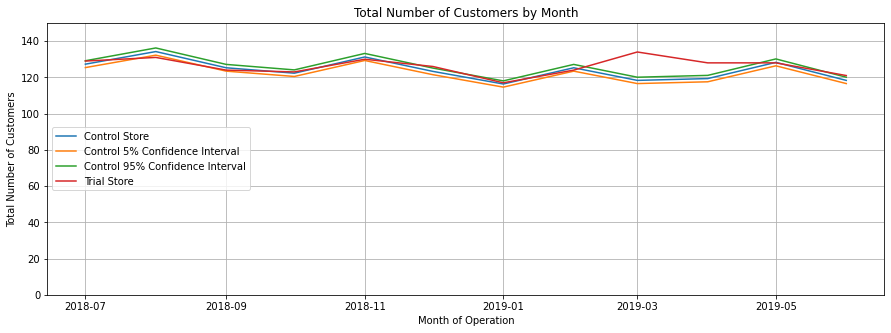

In [177]:
plt.figure(figsize = (15, 5))
plt.plot(combineCustomers)

# Set graph title and axis title
plt.title('Total Number of Customers by Month')
plt.xlabel('Month of Operation')
plt.ylabel('Total Number of Customers')

# Set legend
plt.legend(['Control Store', 'Control 5% Confidence Interval', 'Control 95% Confidence Interval', 'Trial Store'], loc = 6)

# Set new y-axis limit
plt.ylim((0, 150))


# Set grid
plt.grid()
plt.show()


In [178]:
#Agan in terms of number of customers, the control store has higher number in feb 2019 to april 2019.